In [216]:
import datetime as dt
import numpy as np
import pandas as pd
import yfinance as yf

import pyarrow.parquet as pq

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [217]:
# Read Parquet file into an Arrow Table
# table1 = pq.read_table("00_data/MSTR.parquet")
# table2 = pq.read_table("00_data/MSTU.parquet")

# table1 = pq.read_table("00_data/TSLA.parquet")
# table2 = pq.read_table("00_data/TSLL.parquet")

# table1 = pq.read_table("00_data/TSLA.parquet")
# table2 = pq.read_table("00_data/TSLS.parquet")

# table1 = pq.read_table("00_data/QQQ.parquet")
# table2 = pq.read_table("00_data/TQQQ.parquet")

# table1 = pq.read_table("00_data/QQQ.parquet")
# table2 = pq.read_table("00_data/SQQQ.parquet")

# table1 = pq.read_table("00_data/SPY.parquet")       # Big Size File       
# table2 = pq.read_table("00_data/UPRO.parquet")

# table1 = pq.read_table("00_data/SPY.parquet")       # Big Size File
# table2 = pq.read_table("00_data/SPXL.parquet")

# table1 = pq.read_table("00_data/SPY.parquet")       # Big Size File
# table2 = pq.read_table("00_data/SPXU.parquet")

# table1 = pq.read_table("00_data/UPRO.parquet")
# table2 = pq.read_table("00_data/SPXL.parquet")

table1 = pq.read_table("00_data/SPXL.parquet")
table2 = pq.read_table("00_data/SPXU.parquet")

In [218]:

# Convert Arrow Table back to Pandas DataFrame
df1 = table1.to_pandas()
df2 = table2.to_pandas() # (df2 usually is the leveraged ETF)

In [219]:
# # Extract Ticker symbols directly from df1 and df2, column 'Ticker', unique values
ticker1 = df1['Ticker'].unique()[0]
ticker2 = df2['Ticker'].unique()[0]

In [220]:
df1.head()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
0,2012-06-29 08:00:00,SPXL,1340971200000,6.1467,6.1467,6.1417,6.1417,83112.0,6.1453,17
1,2012-06-29 08:02:00,SPXL,1340971320000,6.1542,6.1542,6.1525,6.1525,36000.0,6.1534,3
2,2012-06-29 08:03:00,SPXL,1340971380000,6.1533,6.1533,6.1383,6.1383,18000.0,6.1503,2
3,2012-06-29 08:12:00,SPXL,1340971920000,6.1400,6.1400,6.1400,6.1400,4080.0,6.1400,2
4,2012-06-29 08:17:00,SPXL,1340972220000,6.1733,6.1742,6.1650,6.1650,16800.0,6.1669,3


In [221]:
print(df1.columns)

"""
T: This is a timestamp in milliseconds (Unix epoch time). 
The value 1760140500000 converts to October 10, 2025, 19:55:00 UTC, which matches the Date column.

N: This is likely the number of trades or number of data points used to calculate the VWAP for that time interval. 
The value 26 suggests 26 individual trades or ticks were aggregated.

The N column provides useful information about data quality. 
Higher values of N typically indicate more liquid trading periods with better VWAP reliability
""";

Index(['Date', 'Ticker', 'T', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP',
       'N'],
      dtype='object')


In [222]:
df1.tail()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
1685161,2025-10-10 19:53:00,SPXL,1760140380000,198.60,198.60,198.60,198.60,1106.0,198.5988,12
1685162,2025-10-10 19:55:00,SPXL,1760140500000,198.13,198.13,197.87,198.03,1232.0,197.9350,21
1685163,2025-10-10 19:56:00,SPXL,1760140560000,197.75,197.75,197.75,197.75,343.0,197.7679,7
1685164,2025-10-10 19:57:00,SPXL,1760140620000,197.80,197.89,197.80,197.89,516.0,197.8162,7
1685165,2025-10-10 19:59:00,SPXL,1760140740000,197.95,197.95,197.62,197.75,603.0,197.8103,14


In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685166 entries, 0 to 1685165
Data columns (total 10 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   Date    1685166 non-null  datetime64[ns]
 1   Ticker  1685166 non-null  object        
 2   T       1685166 non-null  int64         
 3   Open    1685166 non-null  float64       
 4   High    1685166 non-null  float64       
 5   Low     1685166 non-null  float64       
 6   Close   1685166 non-null  float64       
 7   Volume  1685166 non-null  float64       
 8   VWAP    1685166 non-null  float64       
 9   N       1685166 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 128.6+ MB


In [224]:
df2.sample(5)

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
2094608,2025-08-11 12:05:00,SPXU,1754928300000,15.47,15.4700,15.465,15.4698,16446.00,15.4696,22
997369,2018-03-27 17:20:00,SPXU,1522185600000,1160.00,1160.0000,1160.000,1160.0000,19.00,1160.0000,3
840850,2016-09-28 08:54:00,SPXU,1475067240000,2345.00,2345.0000,2345.000,2345.0000,8.00,2345.0000,1
1249626,2020-04-16 16:05:00,SPXU,1587067500000,442.25,442.7500,442.250,442.7500,45.72,442.5095,12
1086972,2019-01-09 09:59:00,SPXU,1547045940000,1048.75,1049.2475,1048.375,1048.5000,158.52,1048.5175,9


In [225]:
# Add year, month, day, hour, minute columns for easier filtering on df1 and df2
for df in [df1, df2]:
    df['year'] = pd.to_datetime(df['Date']).dt.year
    df['month'] = pd.to_datetime(df['Date']).dt.month
    df['day'] = pd.to_datetime(df['Date']).dt.day
    df['hour'] = pd.to_datetime(df['Date']).dt.hour
    df['minute'] = pd.to_datetime(df['Date']).dt.minute

In [226]:
# Add a new column 'ym' representing the last day of each month on df1 and df2
for df in [df1, df2]:
    df['ym'] = pd.to_datetime(df['Date']).dt.to_period('M').dt.to_timestamp('M') + pd.offsets.MonthEnd(0)

In [227]:
# Add a new column 'td' representing the trading day within the month on df1 and df2
for df in [df1, df2]:
    df['td'] = df.groupby('ym')['day'].cumcount() + 1 # trading day within the month

In [228]:
# Create trading day counter for minute-level data
for df in [df1, df2]:
    # First, extract just the date (without time) from the datetime
    df['date_only'] = pd.to_datetime(df['Date']).dt.date
    
    # For each year-month group, get unique dates and assign trading day numbers
    df['td'] = df.groupby('ym')['date_only'].transform(
        lambda x: pd.factorize(x)[0] + 1
    )

In [229]:
# Add week number, dt.isocalendar()[1]  # ISO week number
for df in [df1, df2]:
    df['week_number'] = pd.to_datetime(df['Date']).dt.isocalendar().week

In [230]:
# Add day identifier, int to indicate the day of week (0=Monday, 6=Sunday) on df1 and df2
for df in [df1, df2]:
    df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek

In [231]:
# VWAP signal, if Close > VWAP -> 1 else 0 on df1 and df2
for df in [df1, df2]:
    df['vwap_signal'] = np.where(df['Close'] > df['VWAP'], 1, 0)

In [232]:
# Calculate daily simple returns for df1 and df2
# Calculate percentage change of 'Close' within each ticker
df1['ret'] = df1.groupby('Ticker')['Close'].pct_change()
df2['ret'] = df2.groupby('Ticker')['Close'].pct_change()

# fill na values in ret with 0
df1['ret'] = df1['ret'].fillna(0)
df2['ret'] = df2['ret'].fillna(0)

In [233]:
# calculate cumulative returns for df1 and df2
df1['cumret'] = (1 + df1['ret']).cumprod() - 1
df2['cumret'] = (1 + df2['ret']).cumprod() - 1

In [234]:
# Filter last 180 days of data for both df1 and df2
end_date = max(df1['Date'].max(), df2['Date'].max())
start_date = end_date - pd.Timedelta(days=180)
df1_last_180 = df1[df1['Date'] >= start_date]
df2_last_180 = df2[df2['Date'] >= start_date]

In [235]:
"""
Leveraged ETFs tend to have lower length of data compared to their underlying assets due to most recent inception dates.
Apply below filtering only when comparing leveraged ETF with its underlying asset.
"""

'\nLeveraged ETFs tend to have lower length of data compared to their underlying assets due to most recent inception dates.\nApply below filtering only when comparing leveraged ETF with its underlying asset.\n'

In [236]:
# Filter df1 by min() date of df2.date_only (df2 usually is the leveraged ETF, with shorter history)
min_date_df2 = df2['date_only'].min()
df1 = df1[df1['date_only'] >= min_date_df2]

In [237]:
# Add backtest df to be used for strategies backtesting
bt1 = df1.copy()
bt2 = df2.copy()

In [238]:
"""
For MSTR and MSTU, the highest average returns tend to occur before opening hours.
This should be further investigated to understand the underlying causes.

This highest average returns, happens with a very low volume, as it is shown later in the notebook.

Overnight returns (pre/after market) tend to show higher average returns for both tickers.
Intraday returns (during market hours) tend to show lower average returns for both tickers.

""";


In [239]:
# Filter df1 and df2 for Market hours only (9:30 to 16:00), Intraday data
market_hours_df1 = df1[(df1['hour'] >= 9) & ((df1['hour'] < 16) | ((df1['hour'] == 9) & (df1['minute'] >= 30)))]
market_hours_df2 = df2[(df2['hour'] >= 9) & ((df2['hour'] < 16) | ((df2['hour'] == 9) & (df2['minute'] >= 30)))]

# Filter df1 and df2 for first hour of market only
first_hour_df1 = df1[((df1['hour'] == 9) & (df1['minute'] >= 30)) | (df1['hour'] == 10)]
first_hour_df2 = df2[((df2['hour'] == 9) & (df2['minute'] >= 30)) | (df2['hour'] == 10)]

# Filter df1 and df2 for last hour of market only
last_hour_df1 = df1[(df1['hour'] == 15)]
last_hour_df2 = df2[(df2['hour'] == 15)]

In [240]:
# Group df1 and df2 by date_only and calculate daily returns
df1_daily = df1.groupby('date_only').agg({'Close': 'last'}).reset_index()
df1_daily['ret'] = df1_daily['Close'].pct_change().fillna(0)
df1_daily['cumret'] = (1 + df1_daily['ret']).cumprod() - 1
df2_daily = df2.groupby('date_only').agg({'Close': 'last'}).reset_index()
df2_daily['ret'] = df2_daily['Close'].pct_change().fillna(0)
df2_daily['cumret'] = (1 + df2_daily['ret']).cumprod() - 1

# Join df1_daily and df2_daily on date_only
df_joined = df1_daily.merge(df2_daily, on='date_only', suffixes=(f'_{ticker1}', f'_{ticker2}'))

# Display first few rows of df_joined
df_joined.head()

,date_only,Close_SPXL,ret_SPXL,cumret_SPXL,Close_SPXU,ret_SPXU,cumret_SPXU
0,2012-06-29,6.3625,0.000000,0.000000,18804.0,-0.089835,-0.871663
1,2012-07-02,6.3917,0.004589,0.004589,18828.0,0.001276,-0.871499
2,2012-07-03,6.5283,0.021371,0.026059,18404.0,-0.022520,-0.874393
3,2012-07-05,6.4350,-0.014292,0.011395,18636.0,0.012606,-0.872809
4,2012-07-06,6.2967,-0.021492,-0.010342,18988.0,0.018888,-0.870407


In [241]:
bt1.head()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N,...,hour,minute,ym,td,date_only,week_number,day_of_week,vwap_signal,ret,cumret
0,2012-06-29 08:00:00,SPXL,1340971200000,6.1467,6.1467,6.1417,6.1417,83112.0,6.1453,17,...,8,0,2012-06-30,1,2012-06-29,26,4,0,0.000000,0.000000
1,2012-06-29 08:02:00,SPXL,1340971320000,6.1542,6.1542,6.1525,6.1525,36000.0,6.1534,3,...,8,2,2012-06-30,1,2012-06-29,26,4,0,0.001758,0.001758
2,2012-06-29 08:03:00,SPXL,1340971380000,6.1533,6.1533,6.1383,6.1383,18000.0,6.1503,2,...,8,3,2012-06-30,1,2012-06-29,26,4,0,-0.002308,-0.000554
3,2012-06-29 08:12:00,SPXL,1340971920000,6.1400,6.1400,6.1400,6.1400,4080.0,6.1400,2,...,8,12,2012-06-30,1,2012-06-29,26,4,0,0.000277,-0.000277
4,2012-06-29 08:17:00,SPXL,1340972220000,6.1733,6.1742,6.1650,6.1650,16800.0,6.1669,3,...,8,17,2012-06-30,1,2012-06-29,26,4,0,0.004072,0.003794


In [242]:
# Create daily df, grouping by date_only and aggregating OHLCV data (keep last for Open, High, Low, Close; sum for Volume)
daily_df1 = bt1.groupby('date_only').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

daily_df2 = bt2.groupby('date_only').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',   
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

In [243]:
daily_df1.head()

,date_only,Open,High,Low,Close,Volume
0,2012-06-29,6.1467,6.3842,6.1383,6.3625,5489460.0
1,2012-07-02,6.3900,6.4225,6.2667,6.3917,5296788.0
2,2012-07-03,6.3842,6.5388,6.3825,6.5283,3909108.0
3,2012-07-05,6.5800,6.5800,6.3694,6.4350,3295908.0
4,2012-07-06,6.3950,6.3983,6.1667,6.2967,5131980.0


In [244]:
# # Plot daily df for visualization purposes
# plt.figure(figsize=(14, 7))
# # plt.plot(daily_df1['date_only'], daily_df1['Close'], label=ticker1, color='blue')
# plt.plot(daily_df2['date_only'], daily_df2['Close'], label=ticker2, color='orange')
# plt.title(f'Daily Close Prices: {ticker1} vs {ticker2}')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()

In [245]:
# ----------------------------------------------------------------------
# Overnight vs Intraday Strategy Analysis
# ----------------------------------------------------------------------

In [246]:
def calculate_overnight_returns(df):
    """
    Calculate overnight returns.

    It simulates the entry (buy) at the closing price of the current day and exit (sell) at the opening price of the next trading day.
    
    Parameters:
    df: daily DataFrame with aggregated OHLCV data
    tickers: separate run for each ticker is required
    
    Returns:
    DataFrame with additional next_day_open and overnight_return columns for each df (ticker)
    """
    df_new = df.copy()

    # Calculate next day open (shift open price by -1 day)
    df_new['next_day_open'] = df_new['Open'].shift(-1)
            
    # Calculate overnight return: (next_day_open - close) / close
    df_new['overnight_return'] = (
        (df_new['next_day_open'] - df_new['Close']) / 
        df_new['Close']
    )
    # calculate cumulative returns
    df_new['overnight_cumulative_return'] = (1 + df_new['overnight_return']).cumprod() - 1
    
    return df_new

# Apply the function to create a new dataframe
df1_with_overnight = calculate_overnight_returns(daily_df1)
df2_with_overnight = calculate_overnight_returns(daily_df2)


# Display the shape and first few rows to verify
print(f"\nOriginal dataframe shape: {daily_df1.shape}")
print(f"New dataframe shape: {df1_with_overnight.shape}")
print(df1_with_overnight[[
    ('Close'),
    ('next_day_open'),
    ('overnight_return')
]].head(10))

# Display the shape and first few rows to verify
print(f"\nOriginal dataframe shape: {daily_df2.shape}")
print(f"New dataframe shape: {df2_with_overnight.shape}")
print(df2_with_overnight[[
    ('Close'),
    ('next_day_open'),
    ('overnight_return')
]].head(10))


Original dataframe shape: (3340, 6)
New dataframe shape: (3340, 9)
    Close  next_day_open  overnight_return
0  6.3625         6.3900          0.004322
1  6.3917         6.3842         -0.001173
2  6.5283         6.5800          0.007919
3  6.4350         6.3950         -0.006216
4  6.2967         6.2125         -0.013372
5  6.2292         6.3250          0.015379
6  6.0725         6.1283          0.009189
7  6.1042         5.9333         -0.027997
8  5.9967         6.0408          0.007354
9  6.2125         6.2500          0.006036

Original dataframe shape: (4100, 6)
New dataframe shape: (4100, 9)
      Close  next_day_open  overnight_return
0  146520.0       148140.0          0.011057
1  147820.0       146040.0         -0.012042
2  143920.0       143600.0         -0.002223
3  146980.0       144000.0         -0.020275
4  144680.0       146740.0          0.014238
5  158080.0       163200.0          0.032389
6  156440.0       156720.0          0.001790
7  164760.0       164460.0     

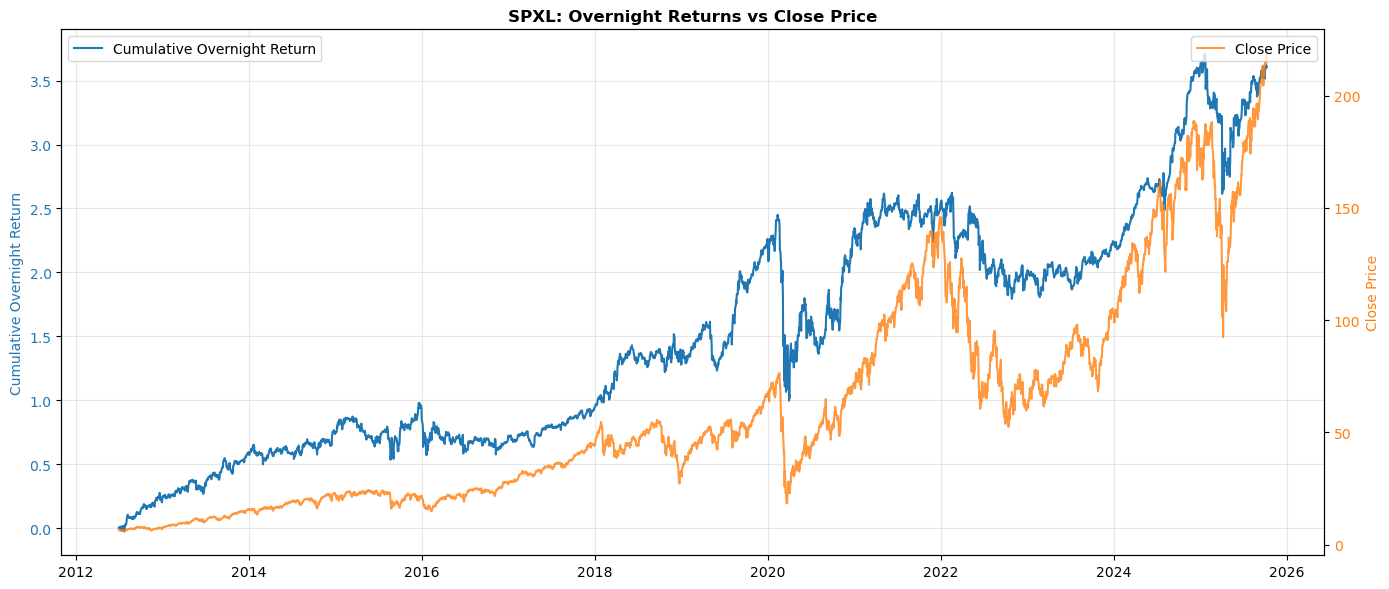

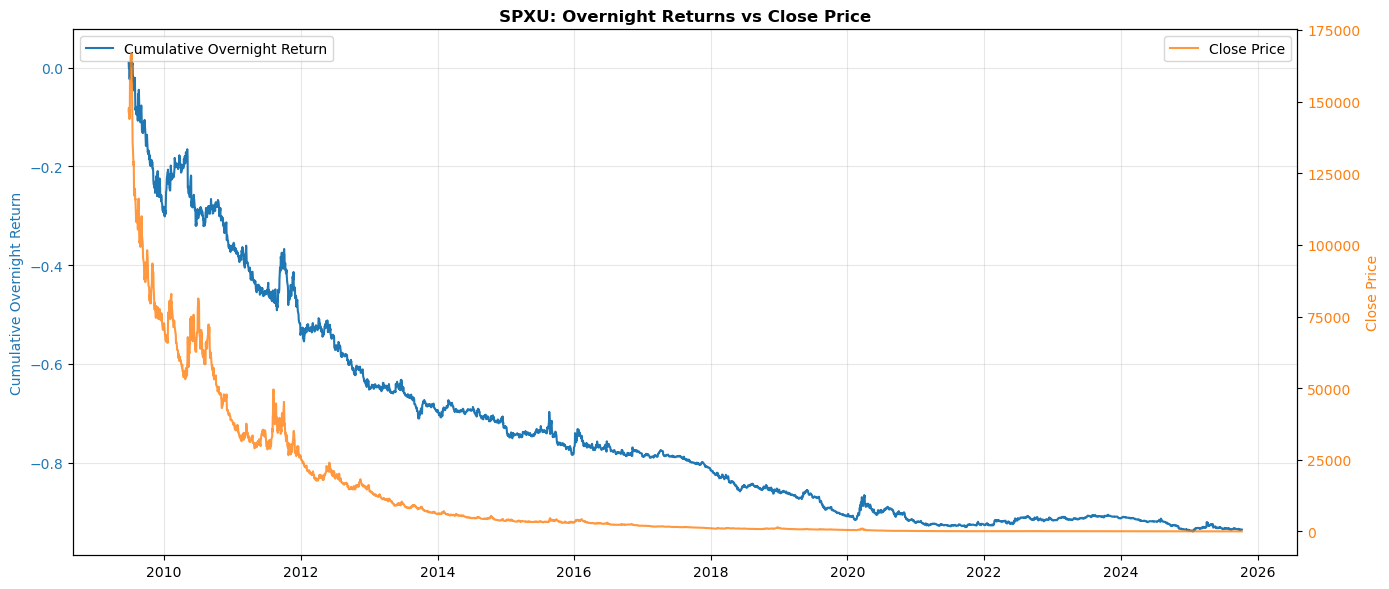

In [247]:
def plot_overnight_returns_vs_close(df, ticker):
    """
    Plot cumulative overnight returns vs close prices.
    Creates a chart with dual y-axes.
    """
    
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Drop NaN rows first, then get all data
    df_clean = df.dropna(subset=['overnight_cumulative_return'])
    cumulative_returns = df_clean['overnight_cumulative_return']
    close_prices = df_clean['Close']
    dates = df_clean['date_only']
        
    # Plot cumulative returns on left y-axis
    color1 = 'tab:blue'
    ax1.set_ylabel('Cumulative Overnight Return', color=color1)
    ax1.plot(dates, cumulative_returns, color=color1, label='Cumulative Overnight Return', linewidth=1.5)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(True, alpha=0.3)
        
    # Create second y-axis for close prices
    ax2 = ax1.twinx()
    color2 = 'tab:orange'
    ax2.set_ylabel('Close Price', color=color2)
    ax2.plot(dates, close_prices, color=color2, label='Close Price', linewidth=1.5, alpha=0.8)
    ax2.tick_params(axis='y', labelcolor=color2)
        
    # Set title
    ax1.set_title(f'{ticker}: Overnight Returns vs Close Price', fontsize=12, fontweight='bold')
        
    # Add legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

# Call the function
plot_overnight_returns_vs_close(df1_with_overnight, ticker1)
plot_overnight_returns_vs_close(df2_with_overnight, ticker2)

In [248]:
# ----------------------------------------------------------------------
# Intraday Strategy 1, Analysis
# ----------------------------------------------------------------------

In [249]:
"""
Strategy 1

Intraday strategy to front-run rebalancing of leveraged ETFs managers

Entry Condition 1: 
Market hours only (9:30 to 16:00), Intraday data

Entry Condition 2:
If the cumulative return from Market Open to 13:59 is positive, buy at 14:00 open

Exit Condition 1:
Sell at Market 15:54 close

Entry Condition 1 and Entry Condition 2 simulate a possible front-running of the leveraged ETF rebalancing.

Paper:
Intraday Share Price Volatility and Leveraged ETF Rebalancing
"6.2 STRATEGIC TRADING
Per our findings above, we implement and compare two trading strategies based on this
expectation of market momentum. The first strategy is executed as follows: if the market has
experienced price movements of ≥ 2 percent or ≤ -2 percent by the end of window 19/20/21
(i.e., 14:15:00/14:30:00/14:45:00) on any given day, one would buy or sell, respectively, a basket
of securities that represent the broad market in anticipation of greater price increases or
decreases."

"strategy is in window 20. In this interval, the ETF strategy is more profitable than the price
strategy. The two most profitable strategies amongst the four studied 26
were trading in window
20 with the ETF strategy (hereafter ETF-20) or trading in window 21 with the price strategy
25"

""";

In [250]:
# Strategy 1 Backtest parameters
threshold_hours_buy = 14
threshold_hours_sell = 15
threshold_hours_sell_minute = 54

In [251]:
bt2_str1 = bt2.copy() # Strategy 1 backtest dataframe

# drop not required columns
bt2_str1 = bt2_str1.drop(columns=[
    'Ticker', 'VWAP', 'N', 'year', 'month', 'day', 
    'ym', 'td', 'week_number', 'day_of_week', 'vwap_signal', 'cumret'
])

# hours filtering: keep only rows between 9:30 and 16:00 (Market Hours)
# Condition 1
bt2_str1 = bt2_str1[
    ((bt2_str1['hour'] == 9) & (bt2_str1['minute'] >= 30)) |
    ((bt2_str1['hour'] >= 10) & (bt2_str1['hour'] < 16))
]

# hours filtering: add bool series for rows between 9:30 and 13:59 (current fixed threshold_hours_buy)
# Condition 2
bt2_str1[f'is_before_{threshold_hours_buy}'] = (
    ((bt2_str1['hour'] == 9) & (bt2_str1['minute'] >= 30)) |
    ((bt2_str1['hour'] >= 10) & (bt2_str1['hour'] < threshold_hours_buy))
)

# display first few rows
bt2_str1.head()

,Date,T,Open,High,Low,Close,Volume,hour,minute,date_only,ret,is_before_14
0,2009-06-25 10:03:00,1245938580000,153560.0,153560.0,153560.0,153560.0,0.15,10,3,2009-06-25,0.000000,True
1,2009-06-25 10:26:00,1245939960000,153040.0,153040.0,153040.0,153040.0,0.10,10,26,2009-06-25,-0.003386,True
2,2009-06-25 10:27:00,1245940020000,152700.0,152700.0,152700.0,152700.0,0.15,10,27,2009-06-25,-0.002222,True
3,2009-06-25 10:29:00,1245940140000,152840.0,152840.0,152840.0,152840.0,0.10,10,29,2009-06-25,0.000917,True
4,2009-06-25 10:45:00,1245941100000,154040.0,154040.0,154000.0,154000.0,0.50,10,45,2009-06-25,0.007590,True


In [252]:
# """
# Filter on returns pct, is not applied yet.
# """

# # filter bt2_str1 where is_before_{threshold_hours_buy} is True
# bt2_str1_before_14 = bt2_str1[bt2_str1[f'is_before_{threshold_hours_buy}'] == True]

# # group by date_only and calculate cumulative return up to 13:59
# bt2_str1_before_14 = bt2_str1_before_14.groupby('date_only').agg({
#     'ret': lambda x: (1 + x).prod() - 1,  # compound returns
# }).reset_index()

# # create a list of dates where cumulative return up to 13:59 is positive
# positive_return_dates = bt2_str1_before_14[bt2_str1_before_14['ret'] > 0]['date_only'].tolist()

In [253]:
"""
This changes the filter from > 0 (any positive return) to > 0.04 (returns greater than 4%), 
which aligns with the paper's threshold (2% of the underline asset x2 ETF leverage).

============================================================================================
Evantually, this threshold can be parameterized to allow easy testing of different values..
============================================================================================

"""


# filter bt2_str1 where is_before_{threshold_hours_buy} is True
bt2_str1_before_14 = bt2_str1[bt2_str1[f'is_before_{threshold_hours_buy}'] == True]

# group by date_only and calculate cumulative return up to 13:59
bt2_str1_before_14 = bt2_str1_before_14.groupby('date_only').agg({
    'ret': lambda x: (1 + x).prod() - 1,  # compound returns
}).reset_index()

# create a list of dates where cumulative return up to 13:59 is higher than 4%
positive_return_dates = bt2_str1_before_14[bt2_str1_before_14['ret'] > 0.04]['date_only'].tolist()

In [254]:
# add bool column where bt2_str1.date_only is in positive_return_dates
bt2_str1['is_positive_return_date'] = bt2_str1['date_only'].isin(positive_return_dates)

# display first few rows
bt2_str1.head()

,Date,T,Open,High,Low,Close,Volume,hour,minute,date_only,ret,is_before_14,is_positive_return_date
0,2009-06-25 10:03:00,1245938580000,153560.0,153560.0,153560.0,153560.0,0.15,10,3,2009-06-25,0.000000,True,False
1,2009-06-25 10:26:00,1245939960000,153040.0,153040.0,153040.0,153040.0,0.10,10,26,2009-06-25,-0.003386,True,False
2,2009-06-25 10:27:00,1245940020000,152700.0,152700.0,152700.0,152700.0,0.15,10,27,2009-06-25,-0.002222,True,False
3,2009-06-25 10:29:00,1245940140000,152840.0,152840.0,152840.0,152840.0,0.10,10,29,2009-06-25,0.000917,True,False
4,2009-06-25 10:45:00,1245941100000,154040.0,154040.0,154000.0,154000.0,0.50,10,45,2009-06-25,0.007590,True,False


In [255]:
# filter bt2_str1 for is_positive_return_date equals True
bt2_str1_positive_dates = bt2_str1[bt2_str1['is_positive_return_date'] == True].copy()

# add column buy_signal: True at 14:00 (or higher), False otherwise
bt2_str1_positive_dates['buy_signal'] = (
    (bt2_str1_positive_dates['hour'] >= threshold_hours_buy)
)

# add column sell_signal: True at 15:54 (or higher), False otherwise
bt2_str1_positive_dates['sell_signal'] = (
    (bt2_str1_positive_dates['hour'] == threshold_hours_sell) & (bt2_str1_positive_dates['minute'] >= threshold_hours_sell_minute)
)

# display first few rows
bt2_str1_positive_dates.head()

,Date,T,Open,High,Low,Close,Volume,hour,minute,date_only,ret,is_before_14,is_positive_return_date,buy_signal,sell_signal
536,2009-06-30 09:30:00,1246368600000,143420.0,143480.0,143420.0,143480.0,0.2000,9,30,2009-06-30,-0.000418,True,True,False,False
537,2009-06-30 09:31:00,1246368660000,143420.0,143580.0,143280.0,143580.0,0.5000,9,31,2009-06-30,0.000697,True,True,False,False
538,2009-06-30 09:32:00,1246368720000,143680.0,143680.0,143480.0,143480.0,0.4000,9,32,2009-06-30,-0.000696,True,True,False,False
539,2009-06-30 09:33:00,1246368780000,143280.0,143280.0,142920.0,142920.0,1.9000,9,33,2009-06-30,-0.003903,True,True,False,False
540,2009-06-30 09:35:00,1246368900000,142640.0,142640.0,142640.0,142640.0,0.0575,9,35,2009-06-30,-0.001959,True,True,False,False


In [256]:
# Get entry price at 14:00 (first row after buy_signal becomes True)
entry_prices = bt2_str1_positive_dates[
    (bt2_str1_positive_dates['hour'] == threshold_hours_buy) & (bt2_str1_positive_dates['minute'] == 0)
].groupby('date_only')['Open'].first()

# Get exit price at 15:54 (close at that minute)
exit_prices = bt2_str1_positive_dates[
    (bt2_str1_positive_dates['hour'] == threshold_hours_sell) & (bt2_str1_positive_dates['minute'] == threshold_hours_sell_minute)
].groupby('date_only')['Close'].first()

# Combine into trades dataframe
bt2_str1_trades = pd.DataFrame({
    'entry_price': entry_prices,
    'exit_price': exit_prices
}).dropna()

# Calculate strategy returns: (exit - entry) / entry
bt2_str1_trades['strategy_return'] = (
    (bt2_str1_trades['exit_price'] - bt2_str1_trades['entry_price']) / 
    bt2_str1_trades['entry_price']
)

# Reset index to get date_only as column
bt2_str1_trades = bt2_str1_trades.reset_index()

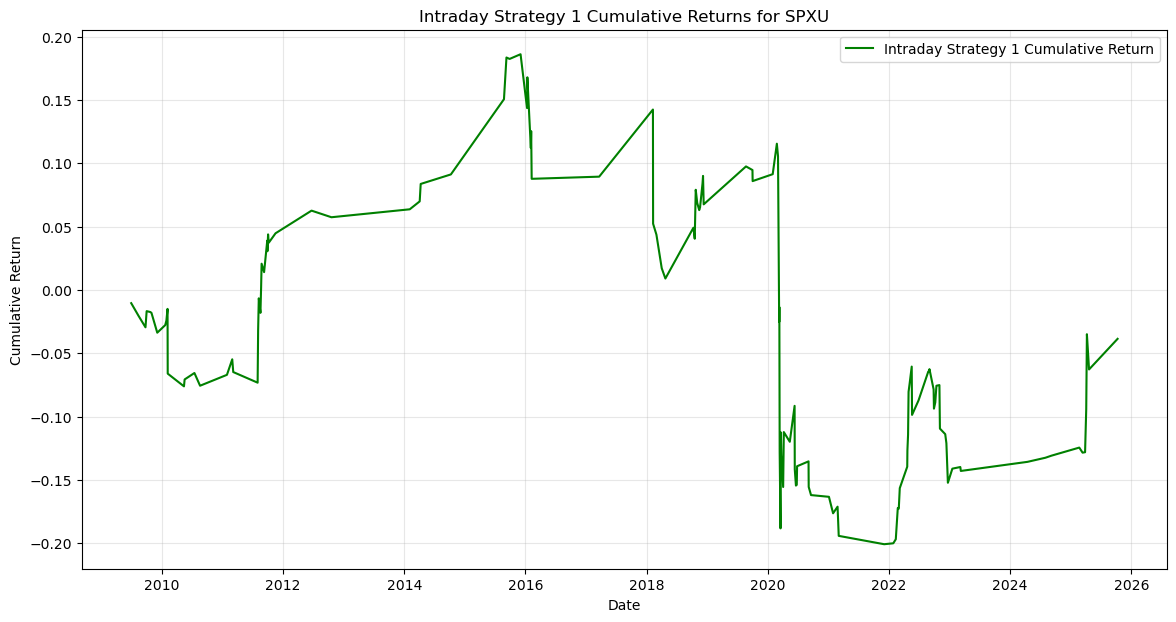

In [257]:
# calculate cumulative strategy returns
bt2_str1_trades['cumulative_strategy_return'] = (1 + bt2_str1_trades['strategy_return']).cumprod() - 1

# plot cumulative strategy returns
plt.figure(figsize=(14, 7))
plt.plot(
    bt2_str1_trades['date_only'], 
    bt2_str1_trades['cumulative_strategy_return'], 
    label='Intraday Strategy 1 Cumulative Return', 
    color='green'
)
plt.title(f'Intraday Strategy 1 Cumulative Returns for {ticker2}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [258]:
# calculate total return and annualized return
total_return = bt2_str1_trades['cumulative_strategy_return'].iloc[-1]
num_days = (bt2_str1_trades['date_only'].max() - bt2_str1_trades['date_only'].min()).days
num_years = num_days / 365
annualized_return = (1 + total_return) ** (1 / num_years) - 1

# calculate win ratio
win_ratio = (bt2_str1_trades['strategy_return'] > 0).sum() / len(bt2_str1_trades)

# calculate sharpe ratio (assuming risk-free rate = 0)
sharpe_ratio = bt2_str1_trades['strategy_return'].mean() / bt2_str1_trades['strategy_return'].std() * np.sqrt(252)

# calculate drawdown
bt2_str1_trades['equity'] = (1 + bt2_str1_trades['strategy_return']).cumprod()
bt2_str1_trades['peak'] = bt2_str1_trades['equity'].cummax()
bt2_str1_trades['drawdown'] = (bt2_str1_trades['equity'] - bt2_str1_trades['peak']) / bt2_str1_trades['peak']
max_drawdown = bt2_str1_trades['drawdown'].min()

# print results
print(f"Total Return: {total_return:.2%}")
print(f"Annualized Return: {annualized_return:.2%}")
print(f"Win Ratio: {win_ratio:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")

Total Return: -3.86%
Annualized Return: -0.24%
Win Ratio: 54.33%
Sharpe Ratio: 0.06
Max Drawdown: -32.62%


In [259]:
# Metric comparison with buy and hold strategy on the same period (daily_df1)
def calculate_buy_and_hold_metrics(daily_df):
    """
    Calculate buy and hold strategy metrics of the underlying asset.
    
    Parameters:
    daily_df: DataFrame with daily OHLCV data
    
    Returns:
    Dictionary with total return, annualized return, win ratio, sharpe ratio, max drawdown
    """
    # Calculate daily returns
    daily_df['daily_return'] = daily_df['Close'].pct_change().fillna(0)
    
    # Calculate cumulative returns
    daily_df['cumulative_return'] = (1 + daily_df['daily_return']).cumprod() - 1
    
    # Calculate equity curve (starts at 1)
    daily_df['equity'] = (1 + daily_df['daily_return']).cumprod()
    
    # Total return
    total_return = daily_df['cumulative_return'].iloc[-1]
    
    # Annualized return
    num_days = (daily_df['date_only'].max() - daily_df['date_only'].min()).days
    num_years = num_days / 365
    annualized_return = (1 + total_return) ** (1 / num_years) - 1
    
    # Win ratio
    win_ratio = (daily_df['daily_return'] > 0).sum() / len(daily_df)
    
    # Sharpe ratio (assuming risk-free rate = 0)
    sharpe_ratio = daily_df['daily_return'].mean() / daily_df['daily_return'].std() * np.sqrt(252)
    
    # Drawdown (calculated from equity curve, not cumulative return)
    daily_df['peak'] = daily_df['equity'].cummax()
    daily_df['drawdown'] = (daily_df['equity'] - daily_df['peak']) / daily_df['peak']
    max_drawdown = daily_df['drawdown'].min()
    
    return {
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Win Ratio': win_ratio,
        'Sharpe Ratio': sharpe_ratio,
        'Max Drawdown': max_drawdown
    }

buy_and_hold_metrics = calculate_buy_and_hold_metrics(daily_df1.copy())

# print buy and hold metrics
print("\nBuy and Hold Strategy Metrics for Underlying Asset:")
print(f"Total Return: {buy_and_hold_metrics['Total Return']:.2%}")
print(f"Annualized Return: {buy_and_hold_metrics['Annualized Return']:.2%}")
print(f"Win Ratio: {buy_and_hold_metrics['Win Ratio']:.2%}")
print(f"Sharpe Ratio: {buy_and_hold_metrics['Sharpe Ratio']:.2f}")
print(f"Max Drawdown: {buy_and_hold_metrics['Max Drawdown']:.2%}")


Buy and Hold Strategy Metrics for Underlying Asset:
Total Return: 3008.06%
Annualized Return: 29.51%
Win Ratio: 54.43%
Sharpe Ratio: 0.77
Max Drawdown: -76.01%


In [260]:
# Sortino Ratio comparison: Strategy 1 vs Buy and Hold
def calculate_sortino_ratio(returns, risk_free_rate=0, periods=252):
    """
    Calculate Sortino ratio using only downside deviation.
    
    Parameters:
    returns: Series of returns
    risk_free_rate: Annual risk-free rate (default 0)
    periods: Annualization factor (252 for daily)
    
    Returns:
    Sortino ratio
    """
    # Calculate excess returns
    excess_returns = returns - risk_free_rate / periods
    
    # Calculate downside deviation (only negative returns)
    downside_returns = returns[returns < 0]
    downside_std = np.sqrt((downside_returns ** 2).mean())
    
    # Annualize
    annualized_downside_std = downside_std * np.sqrt(periods)
    annualized_mean = returns.mean() * periods
    
    sortino_ratio = annualized_mean / annualized_downside_std if annualized_downside_std != 0 else np.nan
    
    return sortino_ratio

# Calculate Sortino for Strategy 1
strategy1_sortino = calculate_sortino_ratio(bt2_str1_trades['strategy_return'])

# Calculate Sortino for Buy and Hold
daily_df1_copy = daily_df1.copy()
daily_df1_copy['daily_return'] = daily_df1_copy['Close'].pct_change().fillna(0)
buy_hold_sortino = calculate_sortino_ratio(daily_df1_copy['daily_return'])

# Print comparison
print("Sortino Ratio Comparison:")
print(f"Strategy 1 (Intraday Front-Running): {strategy1_sortino:.2f}")
print(f"Buy and Hold ({ticker1}):            {buy_hold_sortino:.2f}")
print(f"\nStrategy 1 Sortino is {strategy1_sortino / buy_hold_sortino:.2f}x higher than Buy and Hold" if buy_hold_sortino > 0 else "")

Sortino Ratio Comparison:
Strategy 1 (Intraday Front-Running): 0.05
Buy and Hold (SPXL):            0.74

Strategy 1 Sortino is 0.07x higher than Buy and Hold


In [261]:
# ----------------------------------------------------------------------
# Strategy 1 Optimization
# ----------------------------------------------------------------------

def optimize_strategy1(bt2_data, daily_df1_data, ticker1_name, 
                       buy_hours=[12, 13, 14], 
                       sell_minutes=[54, 55, 56, 57, 58, 59],
                       sell_hour=15,
                       return_threshold=0.04):
    """
    Optimize Strategy 1 parameters by testing different combinations of:
    - Entry hour (threshold_hours_buy)
    - Exit minute (threshold_hours_sell_minute)
    
    Parameters:
    bt2_data: DataFrame with minute-level data for the leveraged ETF
    daily_df1_data: DataFrame with daily data for buy and hold comparison
    ticker1_name: Ticker symbol for underlying asset
    buy_hours: List of hours to test for entry (e.g., [12, 13, 14])
    sell_minutes: List of minutes to test for exit (e.g., [54, 55, 56, 57, 58, 59])
    sell_hour: Hour for exit (default 15)
    return_threshold: Minimum return threshold to trigger entry (default 0.04 = 4%)
    
    Returns:
    DataFrame with optimization results sorted by Sharpe Ratio
    """
    
    results = []
    
    for buy_hour in buy_hours:
        for sell_minute in sell_minutes:
            try:
                # Copy data
                bt2_opt = bt2_data.copy()
                
                # Drop not required columns if they exist
                cols_to_drop = ['Ticker', 'VWAP', 'N', 'year', 'month', 'day', 
                               'ym', 'td', 'week_number', 'day_of_week', 'vwap_signal', 'cumret']
                cols_to_drop = [c for c in cols_to_drop if c in bt2_opt.columns]
                bt2_opt = bt2_opt.drop(columns=cols_to_drop)
                
                # Market hours filtering (9:30 to 16:00)
                bt2_opt = bt2_opt[
                    ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= 30)) |
                    ((bt2_opt['hour'] >= 10) & (bt2_opt['hour'] < 16))
                ]
                
                # Add bool series for rows before entry hour
                bt2_opt[f'is_before_{buy_hour}'] = (
                    ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= 30)) |
                    ((bt2_opt['hour'] >= 10) & (bt2_opt['hour'] < buy_hour))
                )
                
                # Calculate cumulative return before entry hour
                bt2_opt_before = bt2_opt[bt2_opt[f'is_before_{buy_hour}'] == True]
                bt2_opt_before = bt2_opt_before.groupby('date_only').agg({
                    'ret': lambda x: (1 + x).prod() - 1
                }).reset_index()
                
                # Get dates where return exceeds threshold
                positive_return_dates = bt2_opt_before[bt2_opt_before['ret'] > return_threshold]['date_only'].tolist()
                
                if len(positive_return_dates) == 0:
                    continue
                
                # Filter for positive return dates
                bt2_opt['is_positive_return_date'] = bt2_opt['date_only'].isin(positive_return_dates)
                bt2_opt_positive = bt2_opt[bt2_opt['is_positive_return_date'] == True].copy()
                
                # Get entry prices at buy_hour:00
                entry_prices = bt2_opt_positive[
                    (bt2_opt_positive['hour'] == buy_hour) & (bt2_opt_positive['minute'] == 0)
                ].groupby('date_only')['Open'].first()
                
                # Get exit prices at sell_hour:sell_minute
                exit_prices = bt2_opt_positive[
                    (bt2_opt_positive['hour'] == sell_hour) & (bt2_opt_positive['minute'] == sell_minute)
                ].groupby('date_only')['Close'].first()
                
                # Combine into trades dataframe
                trades = pd.DataFrame({
                    'entry_price': entry_prices,
                    'exit_price': exit_prices
                }).dropna()
                
                if len(trades) < 5:  # Minimum trades required
                    continue
                
                # Calculate strategy returns
                trades['strategy_return'] = (trades['exit_price'] - trades['entry_price']) / trades['entry_price']
                trades = trades.reset_index()
                
                # Calculate metrics
                trades['cumulative_return'] = (1 + trades['strategy_return']).cumprod() - 1
                total_return = trades['cumulative_return'].iloc[-1]
                
                num_days = (trades['date_only'].max() - trades['date_only'].min()).days
                num_years = num_days / 365 if num_days > 0 else 1
                annualized_return = (1 + total_return) ** (1 / num_years) - 1
                
                win_ratio = (trades['strategy_return'] > 0).sum() / len(trades)
                
                # Sharpe ratio
                if trades['strategy_return'].std() != 0:
                    sharpe_ratio = trades['strategy_return'].mean() / trades['strategy_return'].std() * np.sqrt(252)
                else:
                    sharpe_ratio = np.nan
                
                # Max drawdown
                trades['equity'] = (1 + trades['strategy_return']).cumprod()
                trades['peak'] = trades['equity'].cummax()
                trades['drawdown'] = (trades['equity'] - trades['peak']) / trades['peak']
                max_drawdown = trades['drawdown'].min()
                
                # Sortino ratio
                downside_returns = trades['strategy_return'][trades['strategy_return'] < 0]
                if len(downside_returns) > 0:
                    downside_std = np.sqrt((downside_returns ** 2).mean())
                    annualized_downside_std = downside_std * np.sqrt(252)
                    annualized_mean = trades['strategy_return'].mean() * 252
                    sortino_ratio = annualized_mean / annualized_downside_std if annualized_downside_std != 0 else np.nan
                else:
                    sortino_ratio = np.nan
                
                results.append({
                    'Buy Hour': buy_hour,
                    'Sell Minute': sell_minute,
                    'Num Trades': len(trades),
                    'Total Return': total_return,
                    'Annualized Return': annualized_return,
                    'Win Ratio': win_ratio,
                    'Sharpe Ratio': sharpe_ratio,
                    'Sortino Ratio': sortino_ratio,
                    'Max Drawdown': max_drawdown
                })
                
            except Exception as e:
                print(f"Error for Buy Hour={buy_hour}, Sell Minute={sell_minute}: {e}")
                continue
    
    # Create results dataframe
    results_df = pd.DataFrame(results)
    
    if len(results_df) == 0:
        print("No valid optimization results found.")
        return None
    
    # Sort by Sharpe Ratio descending
    results_df = results_df.sort_values('Sharpe Ratio', ascending=False).reset_index(drop=True)
    
    return results_df


# Run optimization
print("Running Strategy 1 Optimization...")
print("=" * 70)

optimization_results = optimize_strategy1(
    bt2_data=bt2.copy(),
    daily_df1_data=daily_df1.copy(),
    ticker1_name=ticker1,
    buy_hours=[12, 13, 14],
    sell_minutes=[54, 55, 56, 57, 58, 59],
    sell_hour=15,
    return_threshold=0.04
)

if optimization_results is not None:
    # Display all results
    print("\nAll Optimization Results (sorted by Sharpe Ratio):")
    print("-" * 70)
    
    # Format for display
    display_df = optimization_results.copy()
    display_df['Total Return'] = display_df['Total Return'].apply(lambda x: f"{x:.2%}")
    display_df['Annualized Return'] = display_df['Annualized Return'].apply(lambda x: f"{x:.2%}")
    display_df['Win Ratio'] = display_df['Win Ratio'].apply(lambda x: f"{x:.2%}")
    display_df['Sharpe Ratio'] = display_df['Sharpe Ratio'].apply(lambda x: f"{x:.2f}")
    display_df['Sortino Ratio'] = display_df['Sortino Ratio'].apply(lambda x: f"{x:.2f}")
    display_df['Max Drawdown'] = display_df['Max Drawdown'].apply(lambda x: f"{x:.2%}")
    
    print(display_df.to_string(index=False))
    
    # Best parameters
    best = optimization_results.iloc[0]
    print("\n" + "=" * 70)
    print("BEST PARAMETERS:")
    print(f"  Buy Hour: {int(best['Buy Hour'])}:00")
    print(f"  Sell Time: 15:{int(best['Sell Minute'])}")
    print("=" * 70)
    
    # Comparison with default parameters
    print("\nComparison: Best Optimized vs Default (14:00 entry, 15:54 exit)")
    print("-" * 70)
    
    default_result = optimization_results[
        (optimization_results['Buy Hour'] == 14) & 
        (optimization_results['Sell Minute'] == 54)
    ]
    
    if len(default_result) > 0:
        default = default_result.iloc[0]
        
        comparison_data = {
            'Metric': ['Total Return', 'Annualized Return', 'Win Ratio', 'Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown', 'Num Trades'],
            'Default (14:00, 15:54)': [
                f"{default['Total Return']:.2%}",
                f"{default['Annualized Return']:.2%}",
                f"{default['Win Ratio']:.2%}",
                f"{default['Sharpe Ratio']:.2f}",
                f"{default['Sortino Ratio']:.2f}",
                f"{default['Max Drawdown']:.2%}",
                f"{int(default['Num Trades'])}"
            ],
            f"Best ({int(best['Buy Hour'])}:00, 15:{int(best['Sell Minute'])})": [
                f"{best['Total Return']:.2%}",
                f"{best['Annualized Return']:.2%}",
                f"{best['Win Ratio']:.2%}",
                f"{best['Sharpe Ratio']:.2f}",
                f"{best['Sortino Ratio']:.2f}",
                f"{best['Max Drawdown']:.2%}",
                f"{int(best['Num Trades'])}"
            ]
        }
        
        comparison_df = pd.DataFrame(comparison_data)
        print(comparison_df.to_string(index=False))
    else:
        print("Default parameters (14:00, 15:54) not found in optimization results.")

Running Strategy 1 Optimization...

All Optimization Results (sorted by Sharpe Ratio):
----------------------------------------------------------------------
 Buy Hour  Sell Minute  Num Trades Total Return Annualized Return Win Ratio Sharpe Ratio Sortino Ratio Max Drawdown
       14           57         127       13.38%             0.77%    55.12%         0.77          0.70      -26.91%
       14           58         127       10.85%             0.63%    55.12%         0.67          0.60      -27.62%
       14           59         127        6.58%             0.39%    55.12%         0.51          0.45      -33.55%
       14           56         127        6.15%             0.37%    55.12%         0.49          0.44      -28.63%
       14           55         127        0.23%             0.01%    52.76%         0.24          0.22      -30.13%
       14           54         127       -3.86%            -0.24%    54.33%         0.06          0.05      -32.62%
       13           57        

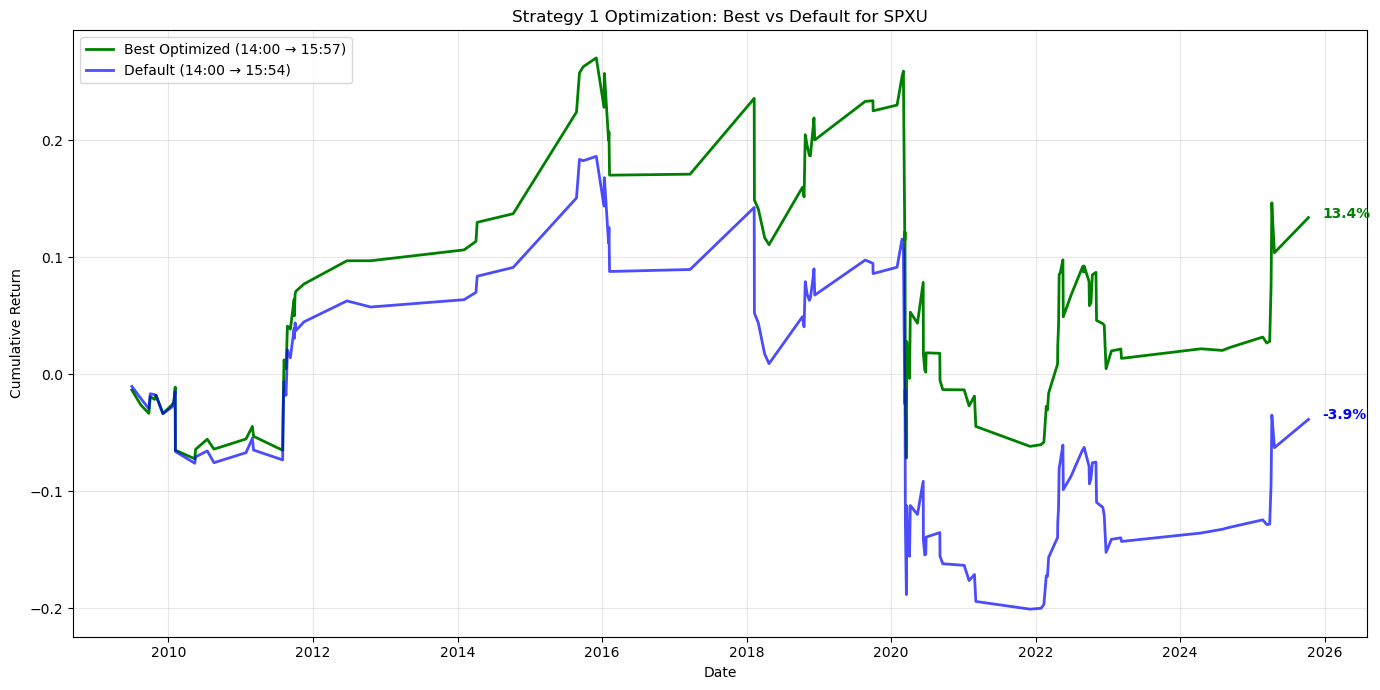


Best Strategy: Entry at 14:00, Exit at 15:57
Best Strategy Final Return: 13.38%
Default Strategy Final Return: -3.86%
Improvement: 17.24% (446.4% relative)


In [262]:
# ----------------------------------------------------------------------
# Plot Best Optimized Strategy
# ----------------------------------------------------------------------

if optimization_results is not None:
    # Get best parameters
    best_buy_hour = int(optimization_results.iloc[0]['Buy Hour'])
    best_sell_minute = int(optimization_results.iloc[0]['Sell Minute'])
    best_sell_hour = 15
    
    # Recreate the best strategy trades for plotting
    bt2_best = bt2.copy()
    
    # Drop not required columns
    cols_to_drop = ['Ticker', 'VWAP', 'N', 'year', 'month', 'day', 
                   'ym', 'td', 'week_number', 'day_of_week', 'vwap_signal', 'cumret']
    cols_to_drop = [c for c in cols_to_drop if c in bt2_best.columns]
    bt2_best = bt2_best.drop(columns=cols_to_drop)
    
    # Market hours filtering
    bt2_best = bt2_best[
        ((bt2_best['hour'] == 9) & (bt2_best['minute'] >= 30)) |
        ((bt2_best['hour'] >= 10) & (bt2_best['hour'] < 16))
    ]
    
    # Add bool series for rows before entry hour
    bt2_best[f'is_before_{best_buy_hour}'] = (
        ((bt2_best['hour'] == 9) & (bt2_best['minute'] >= 30)) |
        ((bt2_best['hour'] >= 10) & (bt2_best['hour'] < best_buy_hour))
    )
    
    # Calculate cumulative return before entry hour
    bt2_best_before = bt2_best[bt2_best[f'is_before_{best_buy_hour}'] == True]
    bt2_best_before = bt2_best_before.groupby('date_only').agg({
        'ret': lambda x: (1 + x).prod() - 1
    }).reset_index()
    
    # Get dates where return exceeds threshold
    positive_return_dates_best = bt2_best_before[bt2_best_before['ret'] > 0.04]['date_only'].tolist()
    
    # Filter for positive return dates
    bt2_best['is_positive_return_date'] = bt2_best['date_only'].isin(positive_return_dates_best)
    bt2_best_positive = bt2_best[bt2_best['is_positive_return_date'] == True].copy()
    
    # Get entry and exit prices
    entry_prices_best = bt2_best_positive[
        (bt2_best_positive['hour'] == best_buy_hour) & (bt2_best_positive['minute'] == 0)
    ].groupby('date_only')['Open'].first()
    
    exit_prices_best = bt2_best_positive[
        (bt2_best_positive['hour'] == best_sell_hour) & (bt2_best_positive['minute'] == best_sell_minute)
    ].groupby('date_only')['Close'].first()
    
    # Create trades dataframe
    best_trades = pd.DataFrame({
        'entry_price': entry_prices_best,
        'exit_price': exit_prices_best
    }).dropna()
    
    best_trades['strategy_return'] = (best_trades['exit_price'] - best_trades['entry_price']) / best_trades['entry_price']
    best_trades = best_trades.reset_index()
    best_trades['cumulative_strategy_return'] = (1 + best_trades['strategy_return']).cumprod() - 1
    
    # Plot comparison: Best Strategy vs Default Strategy
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Plot best optimized strategy
    ax.plot(
        best_trades['date_only'], 
        best_trades['cumulative_strategy_return'], 
        label=f'Best Optimized ({best_buy_hour}:00 → 15:{best_sell_minute})', 
        color='green',
        linewidth=2
    )
    
    # Plot default strategy (already calculated as bt2_str1_trades)
    ax.plot(
        bt2_str1_trades['date_only'], 
        bt2_str1_trades['cumulative_strategy_return'], 
        label=f'Default (14:00 → 15:54)', 
        color='blue',
        linewidth=2,
        alpha=0.7
    )
    
    ax.set_title(f'Strategy 1 Optimization: Best vs Default for {ticker2}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Return')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    
    # Add annotations with final returns
    best_final = best_trades['cumulative_strategy_return'].iloc[-1]
    default_final = bt2_str1_trades['cumulative_strategy_return'].iloc[-1]
    
    ax.annotate(f'{best_final:.1%}', 
                xy=(best_trades['date_only'].iloc[-1], best_final),
                xytext=(10, 0), textcoords='offset points',
                fontsize=10, color='green', fontweight='bold')
    
    ax.annotate(f'{default_final:.1%}', 
                xy=(bt2_str1_trades['date_only'].iloc[-1], default_final),
                xytext=(10, 0), textcoords='offset points',
                fontsize=10, color='blue', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"\nBest Strategy: Entry at {best_buy_hour}:00, Exit at 15:{best_sell_minute}")
    print(f"Best Strategy Final Return: {best_final:.2%}")
    print(f"Default Strategy Final Return: {default_final:.2%}")
    print(f"Improvement: {(best_final - default_final):.2%} ({((best_final - default_final) / abs(default_final) * 100):.1f}% relative)")

In [263]:
# ----------------------------------------------------------------------
# Intraday Strategy 2, VWAP (Buy Only)
# ----------------------------------------------------------------------

In [264]:
"""
Strategy 2, VWAP (Buy Only)

Intraday strategy, alwasy close trades at the end of the day

Entry Condition 1: 
Market hours only (9:30 to 16:00), Intraday data

Entry Condition 2:
Position entry occurs only when the asset price moves outside the noise boundary, 
indicating a significant movement and not "just noise"
lookback_period range 2-5 days
Volatility Multiplier and Lookback Period are later used to define the noise boundary.

Entry Condition 3:
volatility_multiplier range 0.85-1.05
(eventually can be parameterized for optimization)

Entry Condition 4:
start_trade_after_open_minutes = 12 minutes
(eventually can be parameterized for optimization)

Exit Condition 1 (VWAP Exit, Version A):
The position is closed when the asset price hits the VWAP (for Buy positions, exit is Close Price lower than VWAP). 
The VWAP serves as a dynamic stop-loss or support/resistance level.

Exit Condition 2 (Fixed-Time Exit, Version B):
Time-Based Exit if Exit Condition 1 is not met by the end of the trading day (15:54, few minutes before market close).
The exit is always combined with the fixed-time exit.

Paper:
Improvements to Intraday Momentum Strategies Using Parameter Optimization and Different Exit Strategies
"All of the successful strategies found through parameter optimization have a lower lookback period 
than the baseline strategy, some as low as 2 days. This suggests that the momentum strategy is more effective 
when it reacts to recent price movement patterns when predicting a breakout of the noise area and entering 
significant daily movement. The successful VWAP exit strategies use a volatility multiplier close to or even below 1.0"

Paper:
Volume Weighted Average Price (VWAP) The Holy Grail for Day Trading Systems
""

""";

In [265]:
# Dataframe for Strategy 2 backtest
bt2_str2 = bt2.copy()               # Strategy 2 backtest dataframe
bt2_str2_daily = daily_df2.copy()   # Daily dataframe for volatility calculation

In [266]:
# Entry Condition 1: 
# Market hours only (9:30 to 16:00), Intraday data
bt2_str2 = bt2_str2[
    ((bt2_str2['hour'] == 9) & (bt2_str2['minute'] >= 30)) |
    ((bt2_str2['hour'] >= 10) & (bt2_str2['hour'] < 16))
]

# Drop not required columns if they exist
cols_to_drop = ['Ticker', 'T', 'N', 'year', 'month', 'day', 
                               'ym', 'td', 'week_number', 'day_of_week', 'cumret']
cols_to_drop = [c for c in cols_to_drop if c in bt2_str2.columns]
bt2_str2 = bt2_str2.drop(columns=cols_to_drop)

# Display first few rows
bt2_str2.head()

,Date,Open,High,Low,Close,Volume,VWAP,hour,minute,date_only,vwap_signal,ret
0,2009-06-25 10:03:00,153560.0,153560.0,153560.0,153560.0,0.15,153560.0,10,3,2009-06-25,0,0.000000
1,2009-06-25 10:26:00,153040.0,153040.0,153040.0,153040.0,0.10,153040.0,10,26,2009-06-25,0,-0.003386
2,2009-06-25 10:27:00,152700.0,152700.0,152700.0,152700.0,0.15,152700.0,10,27,2009-06-25,0,-0.002222
3,2009-06-25 10:29:00,152840.0,152840.0,152840.0,152840.0,0.10,152840.0,10,29,2009-06-25,0,0.000917
4,2009-06-25 10:45:00,154040.0,154040.0,154000.0,154000.0,0.50,154020.0,10,45,2009-06-25,0,0.007590


In [267]:
bt2_str2_daily.head()

,date_only,Open,High,Low,Close,Volume
0,2009-06-25,153560.0,154040.0,146400.0,146520.0,31.9410
1,2009-06-26,148140.0,150080.0,145740.0,147820.0,62.5450
2,2009-06-29,146040.0,148320.0,143000.0,143920.0,66.2765
3,2009-06-30,143600.0,150040.0,141860.0,146980.0,152.5515
4,2009-07-01,144000.0,145500.0,140860.0,144680.0,159.3335


In [268]:
# Entry Condition 2:
# Position entry occurs only when the asset price moves outside the noise boundary, 
# indicating a significant movement and not "just noise"
# lookback_period range 2-5 days
# Volatility Multiplier and Lookback Period are later used to define the noise boundary.

# Volatility calculation function (daily volatility based on daily close prices, simplified version)
def calculate_daily_volatility(daily_df, lookback_period):
    """
    Calculate daily volatility as rolling standard deviation of daily returns.
    
    Parameters:
    daily_df: DataFrame with daily OHLCV data
    lookback_period: Number of days for rolling window
    
    Returns:
    Series with daily volatility
    """
    daily_df = daily_df.sort_values('date_only')
    daily_df['daily_return'] = daily_df['Close'].pct_change().fillna(0)
    daily_volatility = daily_df['daily_return'].rolling(window=lookback_period).std()
    return daily_volatility

# Calculate daily volatility with lookback period of 3 days
lookback_period_fixed = 3
bt2_str2_daily['daily_volatility'] = calculate_daily_volatility(bt2_str2_daily, lookback_period_fixed)

# # Apply backfill to fill NaN values in daily_volatility (NaN for first few days)
# bt2_str2_daily['daily_volatility'] = bt2_str2_daily['daily_volatility'].fillna(method='bfill')

# Drop rows with NaN daily_volatility
bt2_str2_daily = bt2_str2_daily.dropna(subset=['daily_volatility'])

# Display first few rows
bt2_str2_daily.head()

,date_only,Open,High,Low,Close,Volume,daily_volatility
2,2009-06-29,146040.0,148320.0,143000.0,143920.0,66.2765,0.018338
3,2009-06-30,143600.0,150040.0,141860.0,146980.0,152.5515,0.024720
4,2009-07-01,144000.0,145500.0,140860.0,144680.0,159.3335,0.024992
5,2009-07-02,146740.0,158780.0,146740.0,158080.0,144.4165,0.055039
6,2009-07-06,163200.0,164000.0,155780.0,156440.0,249.4365,0.061042


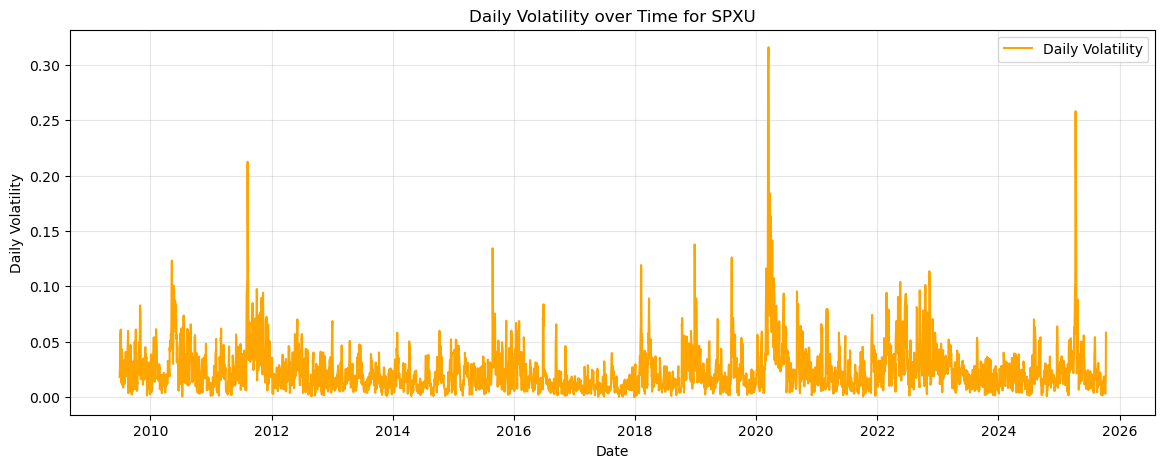

In [269]:
# plot daily volatility over time to visualize data
plt.figure(figsize=(14, 5))
plt.plot(bt2_str2_daily['date_only'], bt2_str2_daily['daily_volatility'], label='Daily Volatility', color='orange')
plt.title(f'Daily Volatility over Time for {ticker2}')
plt.xlabel('Date')
plt.ylabel('Daily Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [270]:
# Entry Condition 3:
# volatility_multiplier range 0.85-1.05
# (eventually can be parameterized for optimization)
volatility_multiplier_fixed = 0.95

# Apply volatility multiplier to daily volatility
bt2_str2_daily['mul_volatility'] = bt2_str2_daily['daily_volatility'] * volatility_multiplier_fixed

# Display first few rows
bt2_str2_daily.head()

,date_only,Open,High,Low,Close,Volume,daily_volatility,mul_volatility
2,2009-06-29,146040.0,148320.0,143000.0,143920.0,66.2765,0.018338,0.017422
3,2009-06-30,143600.0,150040.0,141860.0,146980.0,152.5515,0.024720,0.023484
4,2009-07-01,144000.0,145500.0,140860.0,144680.0,159.3335,0.024992,0.023743
5,2009-07-02,146740.0,158780.0,146740.0,158080.0,144.4165,0.055039,0.052287
6,2009-07-06,163200.0,164000.0,155780.0,156440.0,249.4365,0.061042,0.057990


In [271]:
# Add volatility signal column where multiplied volatility is greater than yesterday's daily volatility (simplified version)
bt2_str2_daily['volatility_signal'] = (
    bt2_str2_daily['mul_volatility'] > bt2_str2_daily['daily_volatility'].shift(1)
)

# Count how many True and False in volatility_signal
volatility_signal_counts = bt2_str2_daily['volatility_signal'].value_counts()

# Print count, percentage of True and False and display dataframe head
print("Volatility Signal Counts:")
print(volatility_signal_counts)
print("\nPercentage of True and False:")
print((volatility_signal_counts / len(bt2_str2_daily)) * 100)
bt2_str2_daily.head()

Volatility Signal Counts:
volatility_signal
False    2352
True     1746
Name: count, dtype: int64

Percentage of True and False:
volatility_signal
False    57.393851
True     42.606149
Name: count, dtype: float64


,date_only,Open,High,Low,Close,Volume,daily_volatility,mul_volatility,volatility_signal
2,2009-06-29,146040.0,148320.0,143000.0,143920.0,66.2765,0.018338,0.017422,False
3,2009-06-30,143600.0,150040.0,141860.0,146980.0,152.5515,0.024720,0.023484,True
4,2009-07-01,144000.0,145500.0,140860.0,144680.0,159.3335,0.024992,0.023743,False
5,2009-07-02,146740.0,158780.0,146740.0,158080.0,144.4165,0.055039,0.052287,True
6,2009-07-06,163200.0,164000.0,155780.0,156440.0,249.4365,0.061042,0.057990,True


In [272]:
# Create a list of dates where volatility_signal is True
volatility_signal_dates = bt2_str2_daily[bt2_str2_daily['volatility_signal'] == True]['date_only'].tolist()

# Add volatility signal to intraday dataframe, bt2_str2, where date_only is in volatility_signal_dates
bt2_str2['volatility_signal'] = bt2_str2['date_only'].isin(volatility_signal_dates)

# Display first few rows
bt2_str2.head()

,Date,Open,High,Low,Close,Volume,VWAP,hour,minute,date_only,vwap_signal,ret,volatility_signal
0,2009-06-25 10:03:00,153560.0,153560.0,153560.0,153560.0,0.15,153560.0,10,3,2009-06-25,0,0.000000,False
1,2009-06-25 10:26:00,153040.0,153040.0,153040.0,153040.0,0.10,153040.0,10,26,2009-06-25,0,-0.003386,False
2,2009-06-25 10:27:00,152700.0,152700.0,152700.0,152700.0,0.15,152700.0,10,27,2009-06-25,0,-0.002222,False
3,2009-06-25 10:29:00,152840.0,152840.0,152840.0,152840.0,0.10,152840.0,10,29,2009-06-25,0,0.000917,False
4,2009-06-25 10:45:00,154040.0,154040.0,154000.0,154000.0,0.50,154020.0,10,45,2009-06-25,0,0.007590,False


In [273]:
# Crosscheck: how many rows with volatility_signal True in bt2_str2, group by date_only and count
volatility_signal_bt2_counts = bt2_str2[bt2_str2['volatility_signal'] == True].groupby('date_only').size()

print("Volatility Signal Counts in Intraday Data (bt2_str2):")
print(volatility_signal_bt2_counts.head())
print("\nTotal Days with Volatility Signal True in Intraday Data:", len(volatility_signal_bt2_counts))

Volatility Signal Counts in Intraday Data (bt2_str2):
date_only
2009-06-30    228
2009-07-02    245
2009-07-06    294
2009-07-13    342
2009-07-16    333
dtype: int64

Total Days with Volatility Signal True in Intraday Data: 1746


In [274]:
# Entry Condition 4:
# start_trade_after_open_minutes = 12 minutes
# (eventually can be parameterized for optimization)
start_trade_after_open_minutes_fixed = 12

# Add bool series for rows after start_trade_after_open_minutes
bt2_str2['is_after_start_trade'] = (
    ((bt2_str2['hour'] == 9) & (bt2_str2['minute'] >= (30 + start_trade_after_open_minutes_fixed))) |
    ((bt2_str2['hour'] > 9))
)

# Display first few rows
bt2_str2.head()

,Date,Open,High,Low,Close,Volume,VWAP,hour,minute,date_only,vwap_signal,ret,volatility_signal,is_after_start_trade
0,2009-06-25 10:03:00,153560.0,153560.0,153560.0,153560.0,0.15,153560.0,10,3,2009-06-25,0,0.000000,False,True
1,2009-06-25 10:26:00,153040.0,153040.0,153040.0,153040.0,0.10,153040.0,10,26,2009-06-25,0,-0.003386,False,True
2,2009-06-25 10:27:00,152700.0,152700.0,152700.0,152700.0,0.15,152700.0,10,27,2009-06-25,0,-0.002222,False,True
3,2009-06-25 10:29:00,152840.0,152840.0,152840.0,152840.0,0.10,152840.0,10,29,2009-06-25,0,0.000917,False,True
4,2009-06-25 10:45:00,154040.0,154040.0,154000.0,154000.0,0.50,154020.0,10,45,2009-06-25,0,0.007590,False,True


In [275]:
# Exit Condition 1 (VWAP Exit, Version A):
# The position is closed when the asset price hits the VWAP (for Buy positions, exit is Close Price lower than VWAP). 
# The VWAP serves as a dynamic stop-loss or support/resistance level.

# Add VWAP exit signal column: True when Close price is lower than VWAP
bt2_str2['vwap_exit_signal'] = bt2_str2['Close'] < bt2_str2['VWAP']

In [276]:
# Exit Condition 2 (Fixed-Time Exit, Version B):
# Time-Based Exit if Exit Condition 1 is not met by the end of the trading day (15:54, few minutes before market close).
# The exit is always combined with the fixed-time exit.
sell_hour_fixed = 15
sell_minute_fixed = 54

# Add fixed-time exit signal column: True at 15:54
bt2_str2['fixed_time_exit_signal'] = (
    (bt2_str2['hour'] == sell_hour_fixed) & (bt2_str2['minute'] == sell_minute_fixed)
)

# Display first few rows
bt2_str2.head()

,Date,Open,High,Low,Close,Volume,VWAP,hour,minute,date_only,vwap_signal,ret,volatility_signal,is_after_start_trade,vwap_exit_signal,fixed_time_exit_signal
0,2009-06-25 10:03:00,153560.0,153560.0,153560.0,153560.0,0.15,153560.0,10,3,2009-06-25,0,0.000000,False,True,False,False
1,2009-06-25 10:26:00,153040.0,153040.0,153040.0,153040.0,0.10,153040.0,10,26,2009-06-25,0,-0.003386,False,True,False,False
2,2009-06-25 10:27:00,152700.0,152700.0,152700.0,152700.0,0.15,152700.0,10,27,2009-06-25,0,-0.002222,False,True,False,False
3,2009-06-25 10:29:00,152840.0,152840.0,152840.0,152840.0,0.10,152840.0,10,29,2009-06-25,0,0.000917,False,True,False,False
4,2009-06-25 10:45:00,154040.0,154040.0,154000.0,154000.0,0.50,154020.0,10,45,2009-06-25,0,0.007590,False,True,True,False


In [277]:
# Drop unnecessary columns, High, Low, Volume, vwap_signal
cols_to_drop_2 = ['High', 'Low', 'Volume', 'vwap_signal']
cols_to_drop_2 = [c for c in cols_to_drop_2 if c in bt2_str2.columns]
bt2_str2 = bt2_str2.drop(columns=cols_to_drop_2)

# Display first few rows
bt2_str2.head()

,Date,Open,Close,VWAP,hour,minute,date_only,ret,volatility_signal,is_after_start_trade,vwap_exit_signal,fixed_time_exit_signal
0,2009-06-25 10:03:00,153560.0,153560.0,153560.0,10,3,2009-06-25,0.000000,False,True,False,False
1,2009-06-25 10:26:00,153040.0,153040.0,153040.0,10,26,2009-06-25,-0.003386,False,True,False,False
2,2009-06-25 10:27:00,152700.0,152700.0,152700.0,10,27,2009-06-25,-0.002222,False,True,False,False
3,2009-06-25 10:29:00,152840.0,152840.0,152840.0,10,29,2009-06-25,0.000917,False,True,False,False
4,2009-06-25 10:45:00,154040.0,154000.0,154020.0,10,45,2009-06-25,0.007590,False,True,True,False


In [278]:
"""
# Backtest Strategy 2, VWAP (Buy Only)
Entry Conditions:
volatility_signal = True
is_after_start_trade = True (Keep first Open price)

Exit Conditions:
for date_only in date_only with volatility_signal = True:
    if vwap_exit_signal = True (Keep Last Close price)
    or 
    fixed_time_exit_signal = True (Keep Last Close price)
""";

# Filter bt2_str2 for volatility_signal = True and is_after_start_trade = True
bt2_str2_filtered = bt2_str2[
    (bt2_str2['volatility_signal'] == True) & 
    (bt2_str2['is_after_start_trade'] == True)
].copy()

# Display first few rows
bt2_str2_filtered.head()

,Date,Open,Close,VWAP,hour,minute,date_only,ret,volatility_signal,is_after_start_trade,vwap_exit_signal,fixed_time_exit_signal
545,2009-06-30 09:42:00,142460.0,142360.0,142395.00,9,42,2009-06-30,-0.001263,True,True,True,False
546,2009-06-30 09:44:00,142320.0,142480.0,142408.00,9,44,2009-06-30,0.000843,True,True,False,False
547,2009-06-30 09:45:00,142200.0,142166.4,142180.88,9,45,2009-06-30,-0.002201,True,True,True,False
548,2009-06-30 09:48:00,142700.0,142740.0,142706.68,9,48,2009-06-30,0.004035,True,True,False,False
549,2009-06-30 09:49:00,142640.0,142640.0,142640.00,9,49,2009-06-30,-0.000701,True,True,False,False


In [279]:
def get_strategy2_trades(df, sell_hour, sell_minute):
    """
    Get entry and exit prices for Strategy 2 based on VWAP and fixed-time exit.
    
    CORRECTED VERSION:
    - Exit at FIRST VWAP signal after entry (not last)
    - If no VWAP exit before fixed-time, use fixed-time exit
    - Properly handles chronological order
    
    Parameters:
    df: DataFrame with intraday data and signals
    sell_hour: Hour for fixed-time exit
    sell_minute: Minute for fixed-time exit
    
    Returns:
    DataFrame with entry_price, exit_price, exit_type, strategy_return
    """
    trades_list = []
    
    grouped = df.groupby('date_only')
    
    for date, group in grouped:
        # Sort by time to ensure chronological order
        group = group.sort_values(['hour', 'minute']).reset_index(drop=True)
        
        if len(group) == 0:
            continue
            
        # Entry: First row after start_trade_after_open_minutes
        entry_row = group.iloc[0]
        entry_price = entry_row['Open']
        entry_idx = 0
        
        exit_row = None
        exit_type = None
        
        # Look for exit AFTER entry (starting from index 1)
        for idx in range(entry_idx + 1, len(group)):
            row = group.iloc[idx]
            current_hour = row['hour']
            current_minute = row['minute']
            
            # Check VWAP exit: Close < VWAP
            if row['vwap_exit_signal'] == True:
                exit_row = row
                exit_type = 'VWAP'
                break  # Exit at FIRST VWAP signal
            
            # Check fixed-time exit
            if current_hour == sell_hour and current_minute == sell_minute:
                exit_row = row
                exit_type = 'Fixed-Time'
                break  # Exit at fixed time
        
        # If no exit found yet, use the last available row before/at fixed time
        if exit_row is None:
            # Get the last row at or before fixed time
            fixed_time_rows = group[
                (group['hour'] < sell_hour) | 
                ((group['hour'] == sell_hour) & (group['minute'] <= sell_minute))
            ]
            if not fixed_time_rows.empty:
                exit_row = fixed_time_rows.iloc[-1]
                exit_type = 'EOD'
        
        if exit_row is not None:
            exit_price = exit_row['Close']
            strategy_return = (exit_price - entry_price) / entry_price
            
            trades_list.append({
                'date_only': date,
                'entry_price': entry_price,
                'entry_hour': entry_row['hour'],
                'entry_minute': entry_row['minute'],
                'exit_price': exit_price,
                'exit_hour': exit_row['hour'] if hasattr(exit_row, 'hour') else exit_row['hour'],
                'exit_minute': exit_row['minute'] if hasattr(exit_row, 'minute') else exit_row['minute'],
                'exit_type': exit_type,
                'strategy_return': strategy_return
            })
    
    trades_df = pd.DataFrame(trades_list)
    return trades_df

# Get trades for Strategy 2
bt2_str2_trades = get_strategy2_trades(
    bt2_str2_filtered,
    sell_hour=sell_hour_fixed,
    sell_minute=sell_minute_fixed
)

In [280]:
# Calculate cumulative strategy returns
bt2_str2_trades['cumulative_strategy_return'] = (1 + bt2_str2_trades['strategy_return']).cumprod() - 1

# Display first few rows of trades
bt2_str2_trades.head()  

,date_only,entry_price,entry_hour,entry_minute,exit_price,exit_hour,exit_minute,exit_type,strategy_return,cumulative_strategy_return
0,2009-06-30,142460.0,9,42,142166.4,9,45,VWAP,-0.002061,-0.002061
1,2009-07-02,153400.0,9,42,153440.0,9,45,VWAP,0.000261,-0.001801
2,2009-07-06,159100.0,9,42,159500.0,9,43,VWAP,0.002514,0.000709
3,2009-07-13,165400.0,9,42,165040.2,9,43,VWAP,-0.002175,-0.001468
4,2009-07-16,138220.2,9,42,138100.0,9,44,VWAP,-0.000870,-0.002336


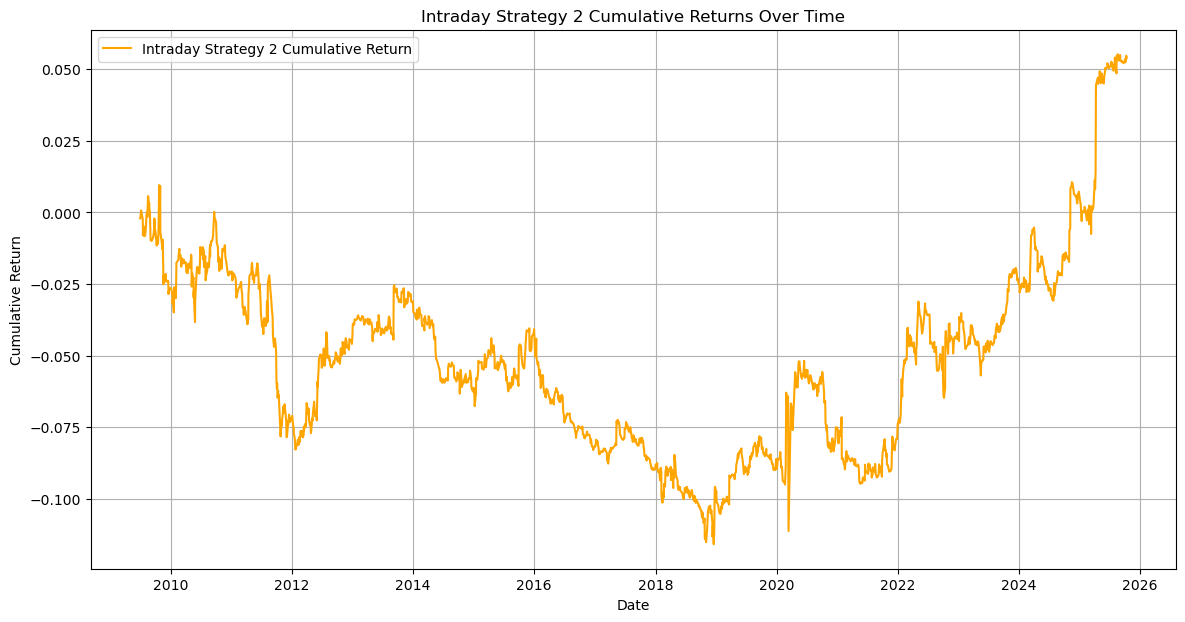

In [281]:
# Plot cumulative strategy returns
plt.figure(figsize=(14, 7))
plt.plot(
    bt2_str2_trades['date_only'], 
    bt2_str2_trades['cumulative_strategy_return'], 
    label='Intraday Strategy 2 Cumulative Return', 
    color='orange',
)
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Intraday Strategy 2 Cumulative Returns Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [282]:
# ----------------------------------------------------------------------
# Strategy 2 Optimization
# ----------------------------------------------------------------------

def optimize_strategy2(bt2_data, daily_df2_data,
                       lookback_periods=[2, 3, 4, 5],
                       volatility_multipliers=[0.85, 0.90, 0.95, 1.00, 1.05],
                       start_trade_minutes=[10, 12, 15, 20],
                       sell_hour=15,
                       sell_minutes=[54, 55, 56, 57, 58, 59]):
    """
    Optimize Strategy 2 parameters by testing different combinations of:
    - Lookback period for volatility calculation
    - Volatility multiplier
    - Start trade after open minutes
    - Exit minute (fixed-time exit)
    
    Parameters:
    bt2_data: DataFrame with minute-level data for the leveraged ETF
    daily_df2_data: DataFrame with daily OHLCV data for volatility calculation
    lookback_periods: List of lookback periods for volatility (e.g., [2, 3, 4, 5])
    volatility_multipliers: List of volatility multipliers (e.g., [0.85, 0.90, 0.95, 1.00, 1.05])
    start_trade_minutes: List of minutes after open to start trading (e.g., [10, 12, 15, 20])
    sell_hour: Hour for fixed-time exit (default 15)
    sell_minutes: List of minutes to test for exit (e.g., [54, 55, 56, 57, 58, 59])
    
    Returns:
    DataFrame with optimization results sorted by Sharpe Ratio
    """
    
    results = []
    total_combinations = len(lookback_periods) * len(volatility_multipliers) * len(start_trade_minutes) * len(sell_minutes)
    current = 0
    
    for lookback in lookback_periods:
        for vol_mult in volatility_multipliers:
            for start_mins in start_trade_minutes:
                for sell_min in sell_minutes:
                    current += 1
                    try:
                        # Copy data
                        bt2_opt = bt2_data.copy()
                        daily_opt = daily_df2_data.copy()
                        
                        # --- Prepare intraday data ---
                        # Market hours filtering (9:30 to 16:00)
                        bt2_opt = bt2_opt[
                            ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= 30)) |
                            ((bt2_opt['hour'] >= 10) & (bt2_opt['hour'] < 16))
                        ]
                        
                        # Drop not required columns if they exist
                        cols_to_drop = ['Ticker', 'T', 'N', 'year', 'month', 'day', 
                                       'ym', 'td', 'week_number', 'day_of_week', 'cumret']
                        cols_to_drop = [c for c in cols_to_drop if c in bt2_opt.columns]
                        bt2_opt = bt2_opt.drop(columns=cols_to_drop)
                        
                        # --- Calculate daily volatility ---
                        daily_opt = daily_opt.sort_values('date_only')
                        daily_opt['daily_return'] = daily_opt['Close'].pct_change().fillna(0)
                        daily_opt['daily_volatility'] = daily_opt['daily_return'].rolling(window=lookback).std()
                        daily_opt = daily_opt.dropna(subset=['daily_volatility'])
                        
                        # Apply volatility multiplier
                        daily_opt['mul_volatility'] = daily_opt['daily_volatility'] * vol_mult
                        
                        # Volatility signal: multiplied volatility > yesterday's volatility
                        daily_opt['volatility_signal'] = (
                            daily_opt['mul_volatility'] > daily_opt['daily_volatility'].shift(1)
                        )
                        
                        # Get dates with volatility signal
                        volatility_signal_dates = daily_opt[daily_opt['volatility_signal'] == True]['date_only'].tolist()
                        
                        if len(volatility_signal_dates) == 0:
                            continue
                        
                        # Add volatility signal to intraday data
                        bt2_opt['volatility_signal'] = bt2_opt['date_only'].isin(volatility_signal_dates)
                        
                        # Add start trade filter
                        bt2_opt['is_after_start_trade'] = (
                            ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= (30 + start_mins))) |
                            ((bt2_opt['hour'] > 9))
                        )
                        
                        # Add VWAP exit signal
                        bt2_opt['vwap_exit_signal'] = bt2_opt['Close'] < bt2_opt['VWAP']
                        
                        # Filter for entry conditions
                        bt2_opt_filtered = bt2_opt[
                            (bt2_opt['volatility_signal'] == True) & 
                            (bt2_opt['is_after_start_trade'] == True)
                        ].copy()
                        
                        if len(bt2_opt_filtered) == 0:
                            continue
                        
                        # --- Get trades ---
                        trades_list = []
                        grouped = bt2_opt_filtered.groupby('date_only')

                        for date, group in grouped:
                            if len(group) == 0:
                                continue
    
                        # Sort by time to ensure chronological order
                        group = group.sort_values(['hour', 'minute']).reset_index(drop=True)
                        
                        entry_row = group.iloc[0]
                        entry_price = entry_row['Open']
                        
                        exit_row = None
                        
                        # Look for exit AFTER entry (starting from index 1)
                        for idx in range(1, len(group)):
                            row = group.iloc[idx]
                            
                            # Check VWAP exit FIRST
                            if row['vwap_exit_signal'] == True:
                                exit_row = row
                                break  # Exit at FIRST VWAP signal
                            
                            # Check fixed-time exit
                            if row['hour'] == sell_hour and row['minute'] == sell_min:
                                exit_row = row
                                break
                        
                        # Fallback: if no exit found, use last row before/at fixed time
                        if exit_row is None:
                            fixed_time_rows = group[
                                (group['hour'] < sell_hour) | 
                                ((group['hour'] == sell_hour) & (group['minute'] <= sell_min))
                            ]
                            if not fixed_time_rows.empty:
                                exit_row = fixed_time_rows.iloc[-1]
                        
                        if exit_row is not None:
                            exit_price = exit_row['Close']
                            strategy_return = (exit_price - entry_price) / entry_price
                            
                            trades_list.append({
                                'date_only': date,
                                'entry_price': entry_price,
                                'exit_price': exit_price,
                                'strategy_return': strategy_return
                            })
                        
                        trades = pd.DataFrame(trades_list)
                        
                        if len(trades) < 5:  # Minimum trades required
                            continue
                        
                        # --- Calculate metrics ---
                        trades['cumulative_return'] = (1 + trades['strategy_return']).cumprod() - 1
                        total_return = trades['cumulative_return'].iloc[-1]
                        
                        num_days = (trades['date_only'].max() - trades['date_only'].min()).days
                        num_years = num_days / 365 if num_days > 0 else 1
                        annualized_return = (1 + total_return) ** (1 / num_years) - 1
                        
                        win_ratio = (trades['strategy_return'] > 0).sum() / len(trades)
                        
                        # Sharpe ratio
                        if trades['strategy_return'].std() != 0:
                            sharpe_ratio = trades['strategy_return'].mean() / trades['strategy_return'].std() * np.sqrt(252)
                        else:
                            sharpe_ratio = np.nan
                        
                        # Max drawdown
                        trades['equity'] = (1 + trades['strategy_return']).cumprod()
                        trades['peak'] = trades['equity'].cummax()
                        trades['drawdown'] = (trades['equity'] - trades['peak']) / trades['peak']
                        max_drawdown = trades['drawdown'].min()
                        
                        # Sortino ratio
                        downside_returns = trades['strategy_return'][trades['strategy_return'] < 0]
                        if len(downside_returns) > 0:
                            downside_std = np.sqrt((downside_returns ** 2).mean())
                            annualized_downside_std = downside_std * np.sqrt(252)
                            annualized_mean = trades['strategy_return'].mean() * 252
                            sortino_ratio = annualized_mean / annualized_downside_std if annualized_downside_std != 0 else np.nan
                        else:
                            sortino_ratio = np.nan
                        
                        results.append({
                            'Lookback': lookback,
                            'Vol Mult': vol_mult,
                            'Start Mins': start_mins,
                            'Sell Minute': sell_min,
                            'Num Trades': len(trades),
                            'Total Return': total_return,
                            'Annualized Return': annualized_return,
                            'Win Ratio': win_ratio,
                            'Sharpe Ratio': sharpe_ratio,
                            'Sortino Ratio': sortino_ratio,
                            'Max Drawdown': max_drawdown
                        })
                        
                    except Exception as e:
                        # Uncomment below to debug
                        # print(f"Error for Lookback={lookback}, VolMult={vol_mult}, StartMins={start_mins}, SellMin={sell_min}: {e}")
                        continue
    
    # Create results dataframe
    results_df = pd.DataFrame(results)
    
    if len(results_df) == 0:
        print("No valid optimization results found.")
        return None
    
    # Sort by Sharpe Ratio descending
    results_df = results_df.sort_values('Sharpe Ratio', ascending=False).reset_index(drop=True)
    
    return results_df


# Run Strategy 2 Optimization
print("Running Strategy 2 Optimization...")
print("=" * 80)

optimization_results_str2 = optimize_strategy2(
    bt2_data=bt2.copy(),
    daily_df2_data=daily_df2.copy(),
    lookback_periods=[2, 3, 4, 5],
    volatility_multipliers=[0.85, 0.90, 0.95, 1.00, 1.05],
    start_trade_minutes=[10, 12, 15, 20],
    sell_hour=15,
    sell_minutes=[54, 56, 58, 59]
)

if optimization_results_str2 is not None:
    # Display top 10 results
    print(f"\nTop 10 Optimization Results (sorted by Sharpe Ratio):")
    print("-" * 80)
    
    # Format for display
    display_df_str2 = optimization_results_str2.head(10).copy()
    display_df_str2['Total Return'] = display_df_str2['Total Return'].apply(lambda x: f"{x:.2%}")
    display_df_str2['Annualized Return'] = display_df_str2['Annualized Return'].apply(lambda x: f"{x:.2%}")
    display_df_str2['Win Ratio'] = display_df_str2['Win Ratio'].apply(lambda x: f"{x:.2%}")
    display_df_str2['Sharpe Ratio'] = display_df_str2['Sharpe Ratio'].apply(lambda x: f"{x:.2f}")
    display_df_str2['Sortino Ratio'] = display_df_str2['Sortino Ratio'].apply(lambda x: f"{x:.2f}")
    display_df_str2['Max Drawdown'] = display_df_str2['Max Drawdown'].apply(lambda x: f"{x:.2%}")
    
    print(display_df_str2.to_string(index=False))
    
    # Best parameters
    best_str2 = optimization_results_str2.iloc[0]
    print("\n" + "=" * 80)
    print("BEST PARAMETERS:")
    print(f"  Lookback Period: {int(best_str2['Lookback'])} days")
    print(f"  Volatility Multiplier: {best_str2['Vol Mult']:.2f}")
    print(f"  Start Trade After Open: {int(best_str2['Start Mins'])} minutes")
    print(f"  Exit Time: 15:{int(best_str2['Sell Minute'])}")
    print("=" * 80)
    
    # Comparison with default parameters (lookback=3, vol_mult=0.95, start_mins=12, sell_min=54)
    print("\nComparison: Best Optimized vs Default (Lookback=3, VolMult=0.95, StartMins=12, Exit=15:54)")
    print("-" * 80)
    
    default_result_str2 = optimization_results_str2[
        (optimization_results_str2['Lookback'] == 3) & 
        (optimization_results_str2['Vol Mult'] == 0.95) &
        (optimization_results_str2['Start Mins'] == 12) &
        (optimization_results_str2['Sell Minute'] == 54)
    ]
    
    if len(default_result_str2) > 0:
        default_str2 = default_result_str2.iloc[0]
        
        comparison_data_str2 = {
            'Metric': ['Total Return', 'Annualized Return', 'Win Ratio', 'Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown', 'Num Trades'],
            'Default': [
                f"{default_str2['Total Return']:.2%}",
                f"{default_str2['Annualized Return']:.2%}",
                f"{default_str2['Win Ratio']:.2%}",
                f"{default_str2['Sharpe Ratio']:.2f}",
                f"{default_str2['Sortino Ratio']:.2f}",
                f"{default_str2['Max Drawdown']:.2%}",
                f"{int(default_str2['Num Trades'])}"
            ],
            f"Best (LB={int(best_str2['Lookback'])}, VM={best_str2['Vol Mult']:.2f}, SM={int(best_str2['Start Mins'])}, Exit=15:{int(best_str2['Sell Minute'])})": [
                f"{best_str2['Total Return']:.2%}",
                f"{best_str2['Annualized Return']:.2%}",
                f"{best_str2['Win Ratio']:.2%}",
                f"{best_str2['Sharpe Ratio']:.2f}",
                f"{best_str2['Sortino Ratio']:.2f}",
                f"{best_str2['Max Drawdown']:.2%}",
                f"{int(best_str2['Num Trades'])}"
            ]
        }
        
        comparison_df_str2 = pd.DataFrame(comparison_data_str2)
        print(comparison_df_str2.to_string(index=False))
    else:
        print("Default parameters not found in optimization results.")
    
    # Print total combinations tested
    print(f"\nTotal combinations tested: {len(optimization_results_str2)}")

Running Strategy 2 Optimization...
No valid optimization results found.


In [283]:
# Check exit type distribution function
bt2_str2_trades_debug = get_strategy2_trades(
    bt2_str2_filtered,
    sell_hour=sell_hour_fixed,
    sell_minute=sell_minute_fixed
)

# Show exit type distribution
print("Exit Type Distribution:")
print(bt2_str2_trades_debug['exit_type'].value_counts())
print(f"\nTotal trades: {len(bt2_str2_trades_debug)}")

# Show sample trades
print("\nSample trades with exit details:")
print(bt2_str2_trades_debug[['date_only', 'entry_hour', 'entry_minute', 
                              'exit_hour', 'exit_minute', 'exit_type', 
                              'strategy_return']].head(20))

Exit Type Distribution:
exit_type
VWAP    1746
Name: count, dtype: int64

Total trades: 1746

Sample trades with exit details:
     date_only  entry_hour  entry_minute  exit_hour  exit_minute exit_type  \
0   2009-06-30           9            42          9           45      VWAP   
1   2009-07-02           9            42          9           45      VWAP   
2   2009-07-06           9            42          9           43      VWAP   
3   2009-07-13           9            42          9           43      VWAP   
4   2009-07-16           9            42          9           44      VWAP   
5   2009-07-17           9            42          9           45      VWAP   
6   2009-07-22           9            42          9           45      VWAP   
7   2009-07-23           9            42          9           43      VWAP   
8   2009-07-24           9            42          9           46      VWAP   
9   2009-07-28           9            42          9           44      VWAP   
10  2009-07-30 

In [284]:
# ----------------------------------------------------------------------
# Plot Best Optimized Strategy 2 vs Default Strategy 2
# ----------------------------------------------------------------------

if optimization_results_str2 is not None:
    # Get best parameters
    best_lookback = int(optimization_results_str2.iloc[0]['Lookback'])
    best_vol_mult = optimization_results_str2.iloc[0]['Vol Mult']
    best_start_mins = int(optimization_results_str2.iloc[0]['Start Mins'])
    best_sell_min = int(optimization_results_str2.iloc[0]['Sell Minute'])
    best_sell_hour = 15
    
    # Default parameters
    default_lookback = 3
    default_vol_mult = 0.95
    default_start_mins = 12
    default_sell_min = 54
    
    def get_strategy2_trades_for_params(bt2_data, daily_df2_data, lookback, vol_mult, start_mins, sell_hour, sell_min):
        """Helper function to get trades for specific Strategy 2 parameters."""
        bt2_opt = bt2_data.copy()
        daily_opt = daily_df2_data.copy()
        
        # Market hours filtering
        bt2_opt = bt2_opt[
            ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= 30)) |
            ((bt2_opt['hour'] >= 10) & (bt2_opt['hour'] < 16))
        ]
        
        # Drop not required columns
        cols_to_drop = ['Ticker', 'T', 'N', 'year', 'month', 'day', 
                       'ym', 'td', 'week_number', 'day_of_week', 'cumret']
        cols_to_drop = [c for c in cols_to_drop if c in bt2_opt.columns]
        bt2_opt = bt2_opt.drop(columns=cols_to_drop)
        
        # Calculate daily volatility
        daily_opt = daily_opt.sort_values('date_only')
        daily_opt['daily_return'] = daily_opt['Close'].pct_change().fillna(0)
        daily_opt['daily_volatility'] = daily_opt['daily_return'].rolling(window=lookback).std()
        daily_opt = daily_opt.dropna(subset=['daily_volatility'])
        
        # Apply volatility multiplier
        daily_opt['mul_volatility'] = daily_opt['daily_volatility'] * vol_mult
        
        # Volatility signal
        daily_opt['volatility_signal'] = (
            daily_opt['mul_volatility'] > daily_opt['daily_volatility'].shift(1)
        )
        
        # Get dates with volatility signal
        volatility_signal_dates = daily_opt[daily_opt['volatility_signal'] == True]['date_only'].tolist()
        
        # Add signals to intraday data
        bt2_opt['volatility_signal'] = bt2_opt['date_only'].isin(volatility_signal_dates)
        bt2_opt['is_after_start_trade'] = (
            ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= (30 + start_mins))) |
            ((bt2_opt['hour'] > 9))
        )
        bt2_opt['vwap_exit_signal'] = bt2_opt['Close'] < bt2_opt['VWAP']
        
        # Filter for entry conditions
        bt2_opt_filtered = bt2_opt[
            (bt2_opt['volatility_signal'] == True) & 
            (bt2_opt['is_after_start_trade'] == True)
        ].copy()
        
        # Get trades
        trades_list = []
        grouped = bt2_opt_filtered.groupby('date_only')
        
        for date, group in grouped:
            if len(group) == 0:
                continue
            entry_row = group.iloc[0]
            entry_price = entry_row['Open']
            
            exit_row = None
            vwap_exits = group[group['vwap_exit_signal'] == True]
            if not vwap_exits.empty:
                exit_row = vwap_exits.iloc[-1]
            else:
                fixed_time_exits = group[
                    (group['hour'] == sell_hour) & (group['minute'] == sell_min)
                ]
                if not fixed_time_exits.empty:
                    exit_row = fixed_time_exits.iloc[-1]
            
            if exit_row is not None:
                exit_price = exit_row['Close']
                strategy_return = (exit_price - entry_price) / entry_price
                trades_list.append({
                    'date_only': date,
                    'strategy_return': strategy_return
                })
        
        trades = pd.DataFrame(trades_list)
        if len(trades) > 0:
            trades['cumulative_strategy_return'] = (1 + trades['strategy_return']).cumprod() - 1
        return trades
    
    # Get trades for best and default parameters
    best_trades_str2 = get_strategy2_trades_for_params(
        bt2.copy(), daily_df2.copy(),
        best_lookback, best_vol_mult, best_start_mins, best_sell_hour, best_sell_min
    )
    
    default_trades_str2 = get_strategy2_trades_for_params(
        bt2.copy(), daily_df2.copy(),
        default_lookback, default_vol_mult, default_start_mins, best_sell_hour, default_sell_min
    )
    
    # Plot comparison
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Plot best optimized strategy
    ax.plot(
        best_trades_str2['date_only'], 
        best_trades_str2['cumulative_strategy_return'], 
        label=f'Best Optimized (LB={best_lookback}, VM={best_vol_mult:.2f}, SM={best_start_mins}, Exit=15:{best_sell_min})', 
        color='green',
        linewidth=2
    )
    
    # Plot default strategy
    ax.plot(
        default_trades_str2['date_only'], 
        default_trades_str2['cumulative_strategy_return'], 
        label=f'Default (LB={default_lookback}, VM={default_vol_mult:.2f}, SM={default_start_mins}, Exit=15:{default_sell_min})', 
        color='blue',
        linewidth=2,
        alpha=0.7
    )
    
    ax.set_title(f'Strategy 2 (VWAP) Optimization: Best vs Default for {ticker2}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Return')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    
    # Add annotations with final returns
    best_final_str2 = best_trades_str2['cumulative_strategy_return'].iloc[-1]
    default_final_str2 = default_trades_str2['cumulative_strategy_return'].iloc[-1]
    
    ax.annotate(f'{best_final_str2:.1%}', 
                xy=(best_trades_str2['date_only'].iloc[-1], best_final_str2),
                xytext=(10, 0), textcoords='offset points',
                fontsize=10, color='green', fontweight='bold')
    
    ax.annotate(f'{default_final_str2:.1%}', 
                xy=(default_trades_str2['date_only'].iloc[-1], default_final_str2),
                xytext=(10, 0), textcoords='offset points',
                fontsize=10, color='blue', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"\nBest Strategy 2: Lookback={best_lookback}, VolMult={best_vol_mult:.2f}, StartMins={best_start_mins}, Exit=15:{best_sell_min}")
    print(f"Best Strategy Final Return: {best_final_str2:.2%}")
    print(f"Default Strategy Final Return: {default_final_str2:.2%}")
    if default_final_str2 != 0:
        print(f"Improvement: {(best_final_str2 - default_final_str2):.2%} ({((best_final_str2 - default_final_str2) / abs(default_final_str2) * 100):.1f}% relative)")
    else:
        print(f"Improvement: {(best_final_str2 - default_final_str2):.2%}")

In [285]:
"""
For the current case (MSTR vs MSTU), all the trades taken by the strategy 
have VWAP exits before the fixed-time exit.

This mostly happens because we are appliying VWAP on very low timeframe data.

We will make an additional analysis on exit types excluding the VWAP exits, using only fixed-time exits.
""";

In [286]:
# ----------------------------------------------------------------------
# Strategy 2 Optimization (Fixed-Time Exit Only, No VWAP)
# ----------------------------------------------------------------------

def optimize_strategy2_no_vwap(bt2_data, daily_df2_data,
                                lookback_periods=[2, 3, 4, 5],
                                volatility_multipliers=[0.85, 0.90, 0.95, 1.00, 1.05],
                                start_trade_minutes=[10, 12, 15, 20],
                                sell_hour=15,
                                sell_minutes=[54, 55, 56, 57, 58, 59]):
    """
    Optimize Strategy 2 parameters (Fixed-Time Exit Only, No VWAP) by testing different combinations of:
    - Lookback period for volatility calculation
    - Volatility multiplier
    - Start trade after open minutes
    - Exit minute (fixed-time exit only)
    
    Parameters:
    bt2_data: DataFrame with minute-level data for the leveraged ETF
    daily_df2_data: DataFrame with daily OHLCV data for volatility calculation
    lookback_periods: List of lookback periods for volatility (e.g., [2, 3, 4, 5])
    volatility_multipliers: List of volatility multipliers (e.g., [0.85, 0.90, 0.95, 1.00, 1.05])
    start_trade_minutes: List of minutes after open to start trading (e.g., [10, 12, 15, 20])
    sell_hour: Hour for fixed-time exit (default 15)
    sell_minutes: List of minutes to test for exit (e.g., [54, 55, 56, 57, 58, 59])
    
    Returns:
    DataFrame with optimization results sorted by Sharpe Ratio
    """
    
    results = []
    
    for lookback in lookback_periods:
        for vol_mult in volatility_multipliers:
            for start_mins in start_trade_minutes:
                for sell_min in sell_minutes:
                    try:
                        # Copy data
                        bt2_opt = bt2_data.copy()
                        daily_opt = daily_df2_data.copy()
                        
                        # --- Prepare intraday data ---
                        # Market hours filtering (9:30 to 16:00)
                        bt2_opt = bt2_opt[
                            ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= 30)) |
                            ((bt2_opt['hour'] >= 10) & (bt2_opt['hour'] < 16))
                        ]
                        
                        # Drop not required columns if they exist
                        cols_to_drop = ['Ticker', 'T', 'N', 'year', 'month', 'day', 
                                       'ym', 'td', 'week_number', 'day_of_week', 'cumret']
                        cols_to_drop = [c for c in cols_to_drop if c in bt2_opt.columns]
                        bt2_opt = bt2_opt.drop(columns=cols_to_drop)
                        
                        # --- Calculate daily volatility ---
                        daily_opt = daily_opt.sort_values('date_only')
                        daily_opt['daily_return'] = daily_opt['Close'].pct_change().fillna(0)
                        daily_opt['daily_volatility'] = daily_opt['daily_return'].rolling(window=lookback).std()
                        daily_opt = daily_opt.dropna(subset=['daily_volatility'])
                        
                        # Apply volatility multiplier
                        daily_opt['mul_volatility'] = daily_opt['daily_volatility'] * vol_mult
                        
                        # Volatility signal: multiplied volatility > yesterday's volatility
                        daily_opt['volatility_signal'] = (
                            daily_opt['mul_volatility'] > daily_opt['daily_volatility'].shift(1)
                        )
                        
                        # Get dates with volatility signal
                        volatility_signal_dates = daily_opt[daily_opt['volatility_signal'] == True]['date_only'].tolist()
                        
                        if len(volatility_signal_dates) == 0:
                            continue
                        
                        # Add volatility signal to intraday data
                        bt2_opt['volatility_signal'] = bt2_opt['date_only'].isin(volatility_signal_dates)
                        
                        # Add start trade filter
                        bt2_opt['is_after_start_trade'] = (
                            ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= (30 + start_mins))) |
                            ((bt2_opt['hour'] > 9))
                        )
                        
                        # Filter for entry conditions
                        bt2_opt_filtered = bt2_opt[
                            (bt2_opt['volatility_signal'] == True) & 
                            (bt2_opt['is_after_start_trade'] == True)
                        ].copy()
                        
                        if len(bt2_opt_filtered) == 0:
                            continue
                        
                        # --- Get trades (Fixed-Time Exit Only) ---
                        trades_list = []
                        grouped = bt2_opt_filtered.groupby('date_only')
                        
                        for date, group in grouped:
                            if len(group) == 0:
                                continue
                            
                            # Sort by time to ensure chronological order
                            group = group.sort_values(['hour', 'minute']).reset_index(drop=True)
                            
                            # Entry: First row after start_trade_after_open_minutes
                            entry_row = group.iloc[0]
                            entry_price = entry_row['Open']
                            
                            # Exit: Fixed-time exit only
                            exit_rows = group[
                                (group['hour'] == sell_hour) & (group['minute'] == sell_min)
                            ]
                            
                            if not exit_rows.empty:
                                exit_row = exit_rows.iloc[0]
                                exit_price = exit_row['Close']
                                strategy_return = (exit_price - entry_price) / entry_price
                                
                                trades_list.append({
                                    'date_only': date,
                                    'entry_price': entry_price,
                                    'exit_price': exit_price,
                                    'strategy_return': strategy_return
                                })
                        
                        trades = pd.DataFrame(trades_list)
                        
                        if len(trades) < 5:  # Minimum trades required
                            continue
                        
                        # --- Calculate metrics ---
                        trades['cumulative_return'] = (1 + trades['strategy_return']).cumprod() - 1
                        total_return = trades['cumulative_return'].iloc[-1]
                        
                        num_days = (trades['date_only'].max() - trades['date_only'].min()).days
                        num_years = num_days / 365 if num_days > 0 else 1
                        annualized_return = (1 + total_return) ** (1 / num_years) - 1
                        
                        win_ratio = (trades['strategy_return'] > 0).sum() / len(trades)
                        
                        # Sharpe ratio
                        if trades['strategy_return'].std() != 0:
                            sharpe_ratio = trades['strategy_return'].mean() / trades['strategy_return'].std() * np.sqrt(252)
                        else:
                            sharpe_ratio = np.nan
                        
                        # Max drawdown
                        trades['equity'] = (1 + trades['strategy_return']).cumprod()
                        trades['peak'] = trades['equity'].cummax()
                        trades['drawdown'] = (trades['equity'] - trades['peak']) / trades['peak']
                        max_drawdown = trades['drawdown'].min()
                        
                        # Sortino ratio
                        downside_returns = trades['strategy_return'][trades['strategy_return'] < 0]
                        if len(downside_returns) > 0:
                            downside_std = np.sqrt((downside_returns ** 2).mean())
                            annualized_downside_std = downside_std * np.sqrt(252)
                            annualized_mean = trades['strategy_return'].mean() * 252
                            sortino_ratio = annualized_mean / annualized_downside_std if annualized_downside_std != 0 else np.nan
                        else:
                            sortino_ratio = np.nan
                        
                        results.append({
                            'Lookback': lookback,
                            'Vol Mult': vol_mult,
                            'Start Mins': start_mins,
                            'Sell Minute': sell_min,
                            'Num Trades': len(trades),
                            'Total Return': total_return,
                            'Annualized Return': annualized_return,
                            'Win Ratio': win_ratio,
                            'Sharpe Ratio': sharpe_ratio,
                            'Sortino Ratio': sortino_ratio,
                            'Max Drawdown': max_drawdown
                        })
                        
                    except Exception as e:
                        continue
    
    # Create results dataframe
    results_df = pd.DataFrame(results)
    
    if len(results_df) == 0:
        print("No valid optimization results found.")
        return None
    
    # Sort by Sharpe Ratio descending
    results_df = results_df.sort_values('Sharpe Ratio', ascending=False).reset_index(drop=True)
    
    return results_df


# Run Strategy 2 Optimization (No VWAP)
print("Running Strategy 2 Optimization (Fixed-Time Exit Only, No VWAP)...")
print("=" * 80)

optimization_results_str2_no_vwap = optimize_strategy2_no_vwap(
    bt2_data=bt2.copy(),
    daily_df2_data=daily_df2.copy(),
    lookback_periods=[2, 3, 4, 5],
    volatility_multipliers=[0.85, 0.90, 0.95, 1.00, 1.05],
    start_trade_minutes=[10, 12, 15, 20],
    sell_hour=15,
    sell_minutes=[54, 55, 56, 57, 58, 59]
)

if optimization_results_str2_no_vwap is not None:
    # Display top 10 results
    print(f"\nTop 10 Optimization Results (sorted by Sharpe Ratio):")
    print("-" * 80)
    
    # Format for display
    display_df_str2_no_vwap = optimization_results_str2_no_vwap.head(10).copy()
    display_df_str2_no_vwap['Total Return'] = display_df_str2_no_vwap['Total Return'].apply(lambda x: f"{x:.2%}")
    display_df_str2_no_vwap['Annualized Return'] = display_df_str2_no_vwap['Annualized Return'].apply(lambda x: f"{x:.2%}")
    display_df_str2_no_vwap['Win Ratio'] = display_df_str2_no_vwap['Win Ratio'].apply(lambda x: f"{x:.2%}")
    display_df_str2_no_vwap['Sharpe Ratio'] = display_df_str2_no_vwap['Sharpe Ratio'].apply(lambda x: f"{x:.2f}")
    display_df_str2_no_vwap['Sortino Ratio'] = display_df_str2_no_vwap['Sortino Ratio'].apply(lambda x: f"{x:.2f}")
    display_df_str2_no_vwap['Max Drawdown'] = display_df_str2_no_vwap['Max Drawdown'].apply(lambda x: f"{x:.2%}")
    
    print(display_df_str2_no_vwap.to_string(index=False))
    
    # Best parameters
    best_str2_no_vwap = optimization_results_str2_no_vwap.iloc[0]
    print("\n" + "=" * 80)
    print("BEST PARAMETERS (No VWAP):")
    print(f"  Lookback Period: {int(best_str2_no_vwap['Lookback'])} days")
    print(f"  Volatility Multiplier: {best_str2_no_vwap['Vol Mult']:.2f}")
    print(f"  Start Trade After Open: {int(best_str2_no_vwap['Start Mins'])} minutes")
    print(f"  Exit Time: 15:{int(best_str2_no_vwap['Sell Minute'])}")
    print("=" * 80)
    
    # Comparison with default parameters
    print("\nComparison: Best Optimized vs Default (Lookback=3, VolMult=0.95, StartMins=12, Exit=15:54)")
    print("-" * 80)
    
    default_result_str2_no_vwap = optimization_results_str2_no_vwap[
        (optimization_results_str2_no_vwap['Lookback'] == 3) & 
        (optimization_results_str2_no_vwap['Vol Mult'] == 0.95) &
        (optimization_results_str2_no_vwap['Start Mins'] == 12) &
        (optimization_results_str2_no_vwap['Sell Minute'] == 54)
    ]
    
    if len(default_result_str2_no_vwap) > 0:
        default_str2_no_vwap = default_result_str2_no_vwap.iloc[0]
        
        comparison_data_str2_no_vwap = {
            'Metric': ['Total Return', 'Annualized Return', 'Win Ratio', 'Sharpe Ratio', 'Sortino Ratio', 'Max Drawdown', 'Num Trades'],
            'Default': [
                f"{default_str2_no_vwap['Total Return']:.2%}",
                f"{default_str2_no_vwap['Annualized Return']:.2%}",
                f"{default_str2_no_vwap['Win Ratio']:.2%}",
                f"{default_str2_no_vwap['Sharpe Ratio']:.2f}",
                f"{default_str2_no_vwap['Sortino Ratio']:.2f}",
                f"{default_str2_no_vwap['Max Drawdown']:.2%}",
                f"{int(default_str2_no_vwap['Num Trades'])}"
            ],
            f"Best": [
                f"{best_str2_no_vwap['Total Return']:.2%}",
                f"{best_str2_no_vwap['Annualized Return']:.2%}",
                f"{best_str2_no_vwap['Win Ratio']:.2%}",
                f"{best_str2_no_vwap['Sharpe Ratio']:.2f}",
                f"{best_str2_no_vwap['Sortino Ratio']:.2f}",
                f"{best_str2_no_vwap['Max Drawdown']:.2%}",
                f"{int(best_str2_no_vwap['Num Trades'])}"
            ]
        }
        
        comparison_df_str2_no_vwap = pd.DataFrame(comparison_data_str2_no_vwap)
        print(comparison_df_str2_no_vwap.to_string(index=False))
    else:
        print("Default parameters not found in optimization results.")
    
    print(f"\nTotal combinations tested: {len(optimization_results_str2_no_vwap)}")

Running Strategy 2 Optimization (Fixed-Time Exit Only, No VWAP)...

Top 10 Optimization Results (sorted by Sharpe Ratio):
--------------------------------------------------------------------------------
 Lookback  Vol Mult  Start Mins  Sell Minute  Num Trades Total Return Annualized Return Win Ratio Sharpe Ratio Sortino Ratio Max Drawdown
        3      0.95          10           56        1734       -3.47%            -0.22%    48.39%         0.21          0.22      -76.71%
        3      0.95          10           58        1733       -5.20%            -0.33%    48.47%         0.21          0.21      -79.20%
        3      0.95          10           59        1734       -6.91%            -0.44%    48.67%         0.21          0.21      -80.25%
        3      0.90          10           56        1521       -6.10%            -0.39%    48.45%         0.20          0.21      -76.27%
        3      0.95          10           57        1734       -6.42%            -0.41%    48.56%         0

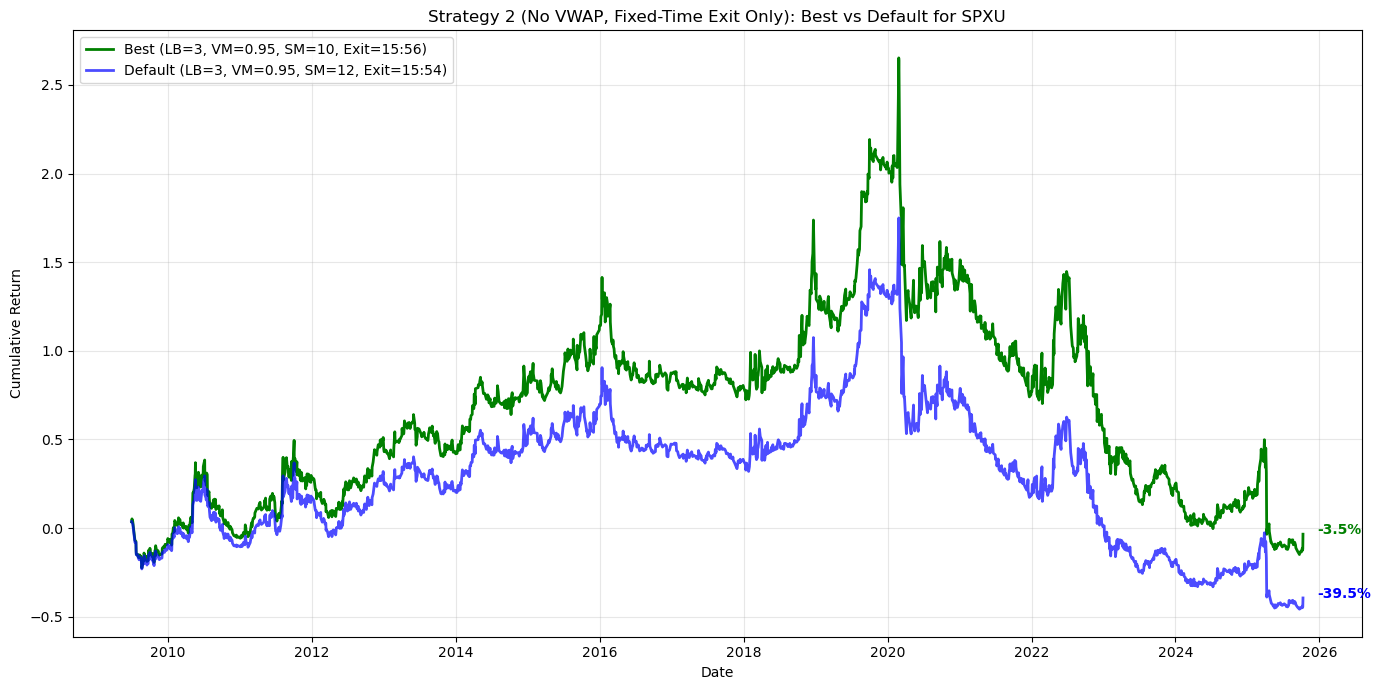


Best Strategy 2 (No VWAP): Lookback=3, VolMult=0.95, StartMins=10, Exit=15:56
Best Strategy Final Return: -3.47%
Default Strategy Final Return: -39.46%
Improvement: 35.99% (91.2% relative)


In [287]:
# ----------------------------------------------------------------------
# Plot Best Optimized Strategy 2 vs Default Strategy 2 (No VWAP)
# ----------------------------------------------------------------------

if optimization_results_str2_no_vwap is not None:
    # Get best parameters
    best_lookback_nv = int(optimization_results_str2_no_vwap.iloc[0]['Lookback'])
    best_vol_mult_nv = optimization_results_str2_no_vwap.iloc[0]['Vol Mult']
    best_start_mins_nv = int(optimization_results_str2_no_vwap.iloc[0]['Start Mins'])
    best_sell_min_nv = int(optimization_results_str2_no_vwap.iloc[0]['Sell Minute'])
    best_sell_hour_nv = 15
    
    # Default parameters
    default_lookback_nv = 3
    default_vol_mult_nv = 0.95
    default_start_mins_nv = 12
    default_sell_min_nv = 54
    
    def get_strategy2_trades_no_vwap(bt2_data, daily_df2_data, lookback, vol_mult, start_mins, sell_hour, sell_min):
        """Helper function to get trades for Strategy 2 without VWAP exit."""
        bt2_opt = bt2_data.copy()
        daily_opt = daily_df2_data.copy()
        
        # Market hours filtering
        bt2_opt = bt2_opt[
            ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= 30)) |
            ((bt2_opt['hour'] >= 10) & (bt2_opt['hour'] < 16))
        ]
        
        # Drop not required columns
        cols_to_drop = ['Ticker', 'T', 'N', 'year', 'month', 'day', 
                       'ym', 'td', 'week_number', 'day_of_week', 'cumret']
        cols_to_drop = [c for c in cols_to_drop if c in bt2_opt.columns]
        bt2_opt = bt2_opt.drop(columns=cols_to_drop)
        
        # Calculate daily volatility
        daily_opt = daily_opt.sort_values('date_only')
        daily_opt['daily_return'] = daily_opt['Close'].pct_change().fillna(0)
        daily_opt['daily_volatility'] = daily_opt['daily_return'].rolling(window=lookback).std()
        daily_opt = daily_opt.dropna(subset=['daily_volatility'])
        
        # Apply volatility multiplier
        daily_opt['mul_volatility'] = daily_opt['daily_volatility'] * vol_mult
        
        # Volatility signal
        daily_opt['volatility_signal'] = (
            daily_opt['mul_volatility'] > daily_opt['daily_volatility'].shift(1)
        )
        
        # Get dates with volatility signal
        volatility_signal_dates = daily_opt[daily_opt['volatility_signal'] == True]['date_only'].tolist()
        
        # Add signals to intraday data
        bt2_opt['volatility_signal'] = bt2_opt['date_only'].isin(volatility_signal_dates)
        bt2_opt['is_after_start_trade'] = (
            ((bt2_opt['hour'] == 9) & (bt2_opt['minute'] >= (30 + start_mins))) |
            ((bt2_opt['hour'] > 9))
        )
        
        # Filter for entry conditions
        bt2_opt_filtered = bt2_opt[
            (bt2_opt['volatility_signal'] == True) & 
            (bt2_opt['is_after_start_trade'] == True)
        ].copy()
        
        # Get trades (Fixed-Time Exit Only)
        trades_list = []
        grouped = bt2_opt_filtered.groupby('date_only')
        
        for date, group in grouped:
            if len(group) == 0:
                continue
            
            group = group.sort_values(['hour', 'minute']).reset_index(drop=True)
            
            entry_row = group.iloc[0]
            entry_price = entry_row['Open']
            
            # Fixed-time exit only
            exit_rows = group[
                (group['hour'] == sell_hour) & (group['minute'] == sell_min)
            ]
            
            if not exit_rows.empty:
                exit_row = exit_rows.iloc[0]
                exit_price = exit_row['Close']
                strategy_return = (exit_price - entry_price) / entry_price
                
                trades_list.append({
                    'date_only': date,
                    'strategy_return': strategy_return
                })
        
        trades = pd.DataFrame(trades_list)
        if len(trades) > 0:
            trades['cumulative_strategy_return'] = (1 + trades['strategy_return']).cumprod() - 1
        return trades
    
    # Get trades for best and default parameters
    best_trades_str2_nv = get_strategy2_trades_no_vwap(
        bt2.copy(), daily_df2.copy(),
        best_lookback_nv, best_vol_mult_nv, best_start_mins_nv, best_sell_hour_nv, best_sell_min_nv
    )
    
    default_trades_str2_nv = get_strategy2_trades_no_vwap(
        bt2.copy(), daily_df2.copy(),
        default_lookback_nv, default_vol_mult_nv, default_start_mins_nv, best_sell_hour_nv, default_sell_min_nv
    )
    
    # Plot comparison
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # Plot best optimized strategy
    ax.plot(
        best_trades_str2_nv['date_only'], 
        best_trades_str2_nv['cumulative_strategy_return'], 
        label=f'Best (LB={best_lookback_nv}, VM={best_vol_mult_nv:.2f}, SM={best_start_mins_nv}, Exit=15:{best_sell_min_nv})', 
        color='green',
        linewidth=2
    )
    
    # Plot default strategy
    ax.plot(
        default_trades_str2_nv['date_only'], 
        default_trades_str2_nv['cumulative_strategy_return'], 
        label=f'Default (LB={default_lookback_nv}, VM={default_vol_mult_nv:.2f}, SM={default_start_mins_nv}, Exit=15:{default_sell_min_nv})', 
        color='blue',
        linewidth=2,
        alpha=0.7
    )
    
    ax.set_title(f'Strategy 2 (No VWAP, Fixed-Time Exit Only): Best vs Default for {ticker2}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative Return')
    ax.legend(loc='upper left')
    ax.grid(True, alpha=0.3)
    
    # Add annotations with final returns
    best_final_str2_nv = best_trades_str2_nv['cumulative_strategy_return'].iloc[-1]
    default_final_str2_nv = default_trades_str2_nv['cumulative_strategy_return'].iloc[-1]
    
    ax.annotate(f'{best_final_str2_nv:.1%}', 
                xy=(best_trades_str2_nv['date_only'].iloc[-1], best_final_str2_nv),
                xytext=(10, 0), textcoords='offset points',
                fontsize=10, color='green', fontweight='bold')
    
    ax.annotate(f'{default_final_str2_nv:.1%}', 
                xy=(default_trades_str2_nv['date_only'].iloc[-1], default_final_str2_nv),
                xytext=(10, 0), textcoords='offset points',
                fontsize=10, color='blue', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"\nBest Strategy 2 (No VWAP): Lookback={best_lookback_nv}, VolMult={best_vol_mult_nv:.2f}, StartMins={best_start_mins_nv}, Exit=15:{best_sell_min_nv}")
    print(f"Best Strategy Final Return: {best_final_str2_nv:.2%}")
    print(f"Default Strategy Final Return: {default_final_str2_nv:.2%}")
    if default_final_str2_nv != 0:
        print(f"Improvement: {(best_final_str2_nv - default_final_str2_nv):.2%} ({((best_final_str2_nv - default_final_str2_nv) / abs(default_final_str2_nv) * 100):.1f}% relative)")
    else:
        print(f"Improvement: {(best_final_str2_nv - default_final_str2_nv):.2%}")